<a href="https://colab.research.google.com/github/venti-sei/Bet26/blob/main/bet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Libraries

In [1]:
# !pip install

# Import Libraries

In [2]:
import os, io, requests
import pandas as pd

In [3]:
# Import Dataset

In [4]:
seasons = {
  "2020-21": "2021",
  "2021-22": "2122",
  "2022-23": "2223",
  "2023-24": "2324",
  "2024-25": "2425",
}

base = "https://www.football-data.co.uk/mmz4281/{}/E0.csv"
out_dir = "premier_league_2020_2025"
os.makedirs(out_dir, exist_ok=True)

frames = []
for label, code in seasons.items():
  url = base.format(code)
  try:
      r = requests.get(url, timeout=30)
      r.raise_for_status()
      df = pd.read_csv(io.BytesIO(r.content))
      df["Season"] = label
      frames.append(df)
      df.to_csv(os.path.join(out_dir, f"E0_{label}.csv"), index=False)
      print(f"✓ downloaded {label}")
  except requests.HTTPError as e:
      print(f"✗ {label} missing ({e}). Skipping.")

# combined file (only for seasons that downloaded)
if frames:
  all_df = pd.concat(frames, ignore_index=True)
  all_df.to_csv(os.path.join(out_dir, "E0_2020_2025_combined.csv"), index=False)
  print(f"Combined shape: {all_df.shape}")

✓ downloaded 2020-21
✓ downloaded 2021-22
✓ downloaded 2022-23
✓ downloaded 2023-24
✓ downloaded 2024-25
Combined shape: (1900, 133)


In [5]:
"""
Date = Match Date (dd/mm/yy)
Time = Time of match kick off
HomeTeam = Home Team
AwayTeam = Away Team
FTHG and HG = Full Time Home Team Goals
FTAG and AG = Full Time Away Team Goals
FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)
HTHG = Half Time Home Team Goals
HTAG = Half Time Away Team Goals
HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

Match Statistics (where available)
Attendance = Crowd Attendance
Referee = Match Referee
HS = Home Team Shots
AS = Away Team Shots
HST = Home Team Shots on Target
AST = Away Team Shots on Target
HHW = Home Team Hit Woodwork
AHW = Away Team Hit Woodwork
HC = Home Team Corners
AC = Away Team Corners
HF = Home Team Fouls Committed
AF = Away Team Fouls Committed
HFKC = Home Team Free Kicks Conceded
AFKC = Away Team Free Kicks Conceded
HO = Home Team Offsides
AO = Away Team Offsides
HY = Home Team Yellow Cards
AY = Away Team Yellow Cards
HR = Home Team Red Cards
AR = Away Team Red Cards
HBP = Home Team Bookings Points (10 = yellow, 25 = red)
ABP = Away Team Bookings Points (10 = yellow, 25 = red)
"""

'\nDate = Match Date (dd/mm/yy)\nTime = Time of match kick off\nHomeTeam = Home Team\nAwayTeam = Away Team\nFTHG and HG = Full Time Home Team Goals\nFTAG and AG = Full Time Away Team Goals\nFTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)\nHTHG = Half Time Home Team Goals\nHTAG = Half Time Away Team Goals\nHTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)\n\nMatch Statistics (where available)\nAttendance = Crowd Attendance\nReferee = Match Referee\nHS = Home Team Shots\nAS = Away Team Shots\nHST = Home Team Shots on Target\nAST = Away Team Shots on Target\nHHW = Home Team Hit Woodwork\nAHW = Away Team Hit Woodwork\nHC = Home Team Corners\nAC = Away Team Corners\nHF = Home Team Fouls Committed\nAF = Away Team Fouls Committed\nHFKC = Home Team Free Kicks Conceded\nAFKC = Away Team Free Kicks Conceded\nHO = Home Team Offsides\nAO = Away Team Offsides\nHY = Home Team Yellow Cards\nAY = Away Team Yellow Cards\nHR = Home Team Red Cards\nAR = Away Team Red Cards\nHBP = Ho

In [6]:
display(all_df.head(1))

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,1XBCH,1XBCD,1XBCA,BFECH,BFECD,BFECA,BFEC>2.5,BFEC<2.5,BFECAHH,BFECAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
relevant_columns = [ 'Date', 'Time', 'HomeTeam', 'AwayTeam',
                    'FTHG',	'FTAG',	'HTHG',	'HTAG',	'HTR',	'Referee',	'HS',	'AS',	'HST',	'AST',	'HF',	'AF',	'HC',	'AC',	'HY',	'AY',	'HR',	'AR' ,'FTR']

# Filter the DataFrame to keep only the relevant columns
filtered_df = all_df[relevant_columns]
display(filtered_df.head())

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,FTR
0,12/09/2020,12:30,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,...,6,12,12,2,3,2,2,0,0,A
1,12/09/2020,15:00,Crystal Palace,Southampton,1,0,1,0,H,J Moss,...,5,14,11,7,3,2,1,0,0,H
2,12/09/2020,17:30,Liverpool,Leeds,4,3,3,2,H,M Oliver,...,3,9,6,9,0,1,0,0,0,H
3,12/09/2020,20:00,West Ham,Newcastle,0,2,0,0,D,S Attwell,...,2,13,7,8,7,2,2,0,0,A
4,13/09/2020,14:00,West Brom,Leicester,0,3,0,0,D,A Taylor,...,7,12,9,2,5,1,1,0,0,A


In [8]:
filtered_df['MatchDateTime'] = pd.to_datetime(filtered_df['Date'] + ' ' + filtered_df['Time'], format='%d/%m/%Y %H:%M')
filtered_df = filtered_df.sort_values(by='MatchDateTime').reset_index(drop=True)
filtered_df['MatchOrder'] = filtered_df.index + 1

display(filtered_df.head())

/tmp/ipython-input-1528726994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['MatchDateTime'] = pd.to_datetime(filtered_df['Date'] + ' ' + filtered_df['Time'], format='%d/%m/%Y %H:%M')


,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,...,AF,HC,AC,HY,AY,HR,AR,FTR,MatchDateTime,MatchOrder
0,12/09/2020,12:30,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,...,12,2,3,2,2,0,0,A,2020-09-12 12:30:00,1
1,12/09/2020,15:00,Crystal Palace,Southampton,1,0,1,0,H,J Moss,...,11,7,3,2,1,0,0,H,2020-09-12 15:00:00,2
2,12/09/2020,17:30,Liverpool,Leeds,4,3,3,2,H,M Oliver,...,6,9,0,1,0,0,0,H,2020-09-12 17:30:00,3
3,12/09/2020,20:00,West Ham,Newcastle,0,2,0,0,D,S Attwell,...,7,8,7,2,2,0,0,A,2020-09-12 20:00:00,4
4,13/09/2020,14:00,West Brom,Leicester,0,3,0,0,D,A Taylor,...,9,2,5,1,1,0,0,A,2020-09-13 14:00:00,5


In [9]:
filtered_df.head(10)

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,...,AF,HC,AC,HY,AY,HR,AR,FTR,MatchDateTime,MatchOrder
0,12/09/2020,12:30,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,...,12,2,3,2,2,0,0,A,2020-09-12 12:30:00,1
1,12/09/2020,15:00,Crystal Palace,Southampton,1,0,1,0,H,J Moss,...,11,7,3,2,1,0,0,H,2020-09-12 15:00:00,2
2,12/09/2020,17:30,Liverpool,Leeds,4,3,3,2,H,M Oliver,...,6,9,0,1,0,0,0,H,2020-09-12 17:30:00,3
3,12/09/2020,20:00,West Ham,Newcastle,0,2,0,0,D,S Attwell,...,7,8,7,2,2,0,0,A,2020-09-12 20:00:00,4
4,13/09/2020,14:00,West Brom,Leicester,0,3,0,0,D,A Taylor,...,9,2,5,1,1,0,0,A,2020-09-13 14:00:00,5
5,13/09/2020,16:30,Tottenham,Everton,0,1,0,0,D,M Atkinson,...,7,5,3,1,0,0,0,A,2020-09-13 16:30:00,6
6,14/09/2020,18:00,Sheffield United,Wolves,0,2,0,2,A,M Dean,...,7,12,5,2,1,0,0,A,2020-09-14 18:00:00,7
7,14/09/2020,20:15,Brighton,Chelsea,1,3,0,1,A,C Pawson,...,13,4,3,1,0,0,0,A,2020-09-14 20:15:00,8
8,19/09/2020,12:30,Everton,West Brom,5,2,2,1,H,M Dean,...,11,11,1,1,0,0,1,H,2020-09-19 12:30:00,9
9,19/09/2020,15:00,Leeds,Fulham,4,3,2,1,H,A Taylor,...,18,5,3,1,2,0,0,H,2020-09-19 15:00:00,10


In [10]:
filtered_df.tail(10)

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,...,AF,HC,AC,HY,AY,HR,AR,FTR,MatchDateTime,MatchOrder
1890,25/05/2025,16:00,Nott'm Forest,Chelsea,0,1,0,0,D,A Taylor,...,11,7,4,2,2,0,0,A,2025-05-25 16:00:00,1891
1891,25/05/2025,16:00,Newcastle,Everton,0,1,0,0,D,T Harrington,...,9,12,3,1,4,0,0,A,2025-05-25 16:00:00,1892
1892,25/05/2025,16:00,Southampton,Arsenal,1,2,0,1,A,D Bond,...,8,5,8,0,0,0,0,A,2025-05-25 16:00:00,1893
1893,25/05/2025,16:00,Man United,Aston Villa,2,0,0,0,D,T Bramall,...,10,4,3,2,2,0,1,H,2025-05-25 16:00:00,1894
1894,25/05/2025,16:00,Tottenham,Brighton,1,4,1,0,H,R Jones,...,8,2,11,3,1,0,0,A,2025-05-25 16:00:00,1895
1895,25/05/2025,16:00,Ipswich,West Ham,1,3,0,1,A,T Robinson,...,9,4,0,1,1,0,0,A,2025-05-25 16:00:00,1896
1896,25/05/2025,16:00,Fulham,Man City,0,2,0,1,A,A Madley,...,5,1,6,0,0,0,0,A,2025-05-25 16:00:00,1897
1897,25/05/2025,16:00,Bournemouth,Leicester,2,0,0,0,D,L Smith,...,16,6,1,0,2,0,0,H,2025-05-25 16:00:00,1898
1898,25/05/2025,16:00,Liverpool,Crystal Palace,1,1,0,1,A,D England,...,10,11,0,1,0,1,0,D,2025-05-25 16:00:00,1899
1899,25/05/2025,16:00,Wolves,Brentford,1,1,0,1,A,C Pawson,...,9,8,3,2,1,0,0,D,2025-05-25 16:00:00,1900


In [11]:
filtered_df = filtered_df.drop(columns=['Date', 'Time', 'MatchDateTime'])
display(filtered_df.head())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,HF,AF,HC,AC,HY,AY,HR,AR,FTR,MatchOrder
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,...,12,12,2,3,2,2,0,0,A,1
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,...,14,11,7,3,2,1,0,0,H,2
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,...,9,6,9,0,1,0,0,0,H,3
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,...,13,7,8,7,2,2,0,0,A,4
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,...,12,9,2,5,1,1,0,0,A,5


# Check Nonvalues

In [12]:
display(filtered_df.isnull().sum())

,0
HomeTeam,0
AwayTeam,0
FTHG,0
FTAG,0
HTHG,0
HTAG,0
HTR,0
Referee,0
HS,0
AS,0


In [13]:
import numpy as np

conditions = [
    filtered_df['FTR'] == 'H',
    filtered_df['FTR'] == 'D'
]

choices = [3, 1]

filtered_df['HP'] = np.select(conditions, choices, default=0)

display(filtered_df.head())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,AF,HC,AC,HY,AY,HR,AR,FTR,MatchOrder,HP
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,...,12,2,3,2,2,0,0,A,1,0
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,...,11,7,3,2,1,0,0,H,2,3
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,...,6,9,0,1,0,0,0,H,3,3
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,...,7,8,7,2,2,0,0,A,4,0
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,...,9,2,5,1,1,0,0,A,5,0


In [14]:
conditions_ap = [
    filtered_df['FTR'] == 'A',
    filtered_df['FTR'] == 'D'
]

choices_ap = [3, 1]

filtered_df['AP'] = np.select(conditions_ap, choices_ap, default=0)

display(filtered_df.head())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,HC,AC,HY,AY,HR,AR,FTR,MatchOrder,HP,AP
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,...,2,3,2,2,0,0,A,1,0,3
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,...,7,3,2,1,0,0,H,2,3,0
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,...,9,0,1,0,0,0,H,3,3,0
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,...,8,7,2,2,0,0,A,4,0,3
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,...,2,5,1,1,0,0,A,5,0,3


In [15]:
display(filtered_df.head())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,HC,AC,HY,AY,HR,AR,FTR,MatchOrder,HP,AP
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,...,2,3,2,2,0,0,A,1,0,3
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,...,7,3,2,1,0,0,H,2,3,0
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,...,9,0,1,0,0,0,H,3,3,0
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,...,8,7,2,2,0,0,A,4,0,3
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,...,2,5,1,1,0,0,A,5,0,3


# Feature Collection

## Add HRP and ARP

In [16]:
home_matches = filtered_df[['HomeTeam', 'AwayTeam', 'HP', 'MatchOrder']].copy()
home_matches.rename(columns={'HomeTeam': 'Team', 'AwayTeam': 'Opponent', 'HP': 'Points'}, inplace=True)

away_matches = filtered_df[['AwayTeam', 'HomeTeam', 'AP', 'MatchOrder']].copy()
away_matches.rename(columns={'AwayTeam': 'Team', 'HomeTeam': 'Opponent', 'AP': 'Points'}, inplace=True)

combined_match_data = pd.concat([home_matches, away_matches], ignore_index=True)
combined_match_data = combined_match_data.sort_values(by='MatchOrder').reset_index(drop=True)

display(combined_match_data.head())

,Team,Opponent,Points,MatchOrder
0,Fulham,Arsenal,0,1
1,Arsenal,Fulham,3,1
2,Crystal Palace,Southampton,3,2
3,Southampton,Crystal Palace,0,2
4,Liverpool,Leeds,3,3


In [17]:
combined_match_data['RollingPoints'] = combined_match_data.groupby('Team')['Points'].transform(lambda x: x.rolling(window=10, min_periods=1).sum().shift(1))
display(combined_match_data.head(20))

,Team,Opponent,Points,MatchOrder,RollingPoints
0,Fulham,Arsenal,0,1,NaN
1,Arsenal,Fulham,3,1,NaN
2,Crystal Palace,Southampton,3,2,NaN
3,Southampton,Crystal Palace,0,2,NaN
4,Liverpool,Leeds,3,3,NaN
5,Leeds,Liverpool,0,3,NaN
6,Newcastle,West Ham,3,4,NaN
7,West Ham,Newcastle,0,4,NaN
8,Leicester,West Brom,3,5,NaN
9,West Brom,Leicester,0,5,NaN


In [18]:
home_rolling_points = combined_match_data[combined_match_data['Team'] == combined_match_data['Opponent']].drop(columns=['Opponent'])
filtered_df = pd.merge(filtered_df, combined_match_data[['Team', 'MatchOrder', 'RollingPoints']], left_on=['HomeTeam', 'MatchOrder'], right_on=['Team', 'MatchOrder'], how='left')
filtered_df.rename(columns={'RollingPoints': 'HRP'}, inplace=True)
filtered_df.drop(columns=['Team'], inplace=True)

filtered_df = pd.merge(filtered_df, combined_match_data[['Team', 'MatchOrder', 'RollingPoints']], left_on=['AwayTeam', 'MatchOrder'], right_on=['Team', 'MatchOrder'], how='left')
filtered_df.rename(columns={'RollingPoints': 'ARP'}, inplace=True)
filtered_df.drop(columns=['Team'], inplace=True)

display(filtered_df.tail(10))

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,HY,AY,HR,AR,FTR,MatchOrder,HP,AP,HRP,ARP
1890,Nott'm Forest,Chelsea,0,1,0,0,D,A Taylor,10,6,...,2,2,0,0,A,1891,0,3,17.0,20.0
1891,Newcastle,Everton,0,1,0,0,D,T Harrington,17,14,...,1,4,0,0,A,1892,0,3,22.0,13.0
1892,Southampton,Arsenal,1,2,0,1,A,D Bond,7,23,...,0,0,0,0,A,1893,0,3,3.0,17.0
1893,Man United,Aston Villa,2,0,0,0,D,T Bramall,25,6,...,2,2,0,1,H,1894,3,0,6.0,24.0
1894,Tottenham,Brighton,1,4,1,0,H,R Jones,4,23,...,3,1,0,0,A,1895,0,3,5.0,15.0
1895,Ipswich,West Ham,1,3,0,1,A,T Robinson,14,10,...,1,1,0,0,A,1896,0,3,5.0,7.0
1896,Fulham,Man City,0,2,0,1,A,A Madley,13,20,...,0,0,0,0,A,1897,0,3,12.0,21.0
1897,Bournemouth,Leicester,2,0,0,0,D,L Smith,20,3,...,0,2,0,0,H,1898,3,0,10.0,8.0
1898,Liverpool,Crystal Palace,1,1,0,1,A,D England,14,8,...,1,0,1,0,D,1899,1,1,19.0,16.0
1899,Wolves,Brentford,1,1,0,1,A,C Pawson,18,13,...,2,1,0,0,D,1900,1,1,19.0,17.0


## Last 5 Home and Away Points

# Task
Calculate 'HL5HP' by creating a temporary DataFrame for home matches, grouping by 'HomeTeam', calculating the rolling sum of 'HP' over the last 5 matches (shifted by 1), and then merging the result into `filtered_df`. Similarly, calculate 'AL5AP' by creating a temporary DataFrame for away matches, grouping by 'AwayTeam', calculating the rolling sum of 'AP' over the last 5 matches (shifted by 1), and then merging the result into `filtered_df`.

## Calculate Home Team Last 5 Home Points

### Subtask:
Create a temporary DataFrame with only home matches, calculate the rolling sum of 'HP' for each HomeTeam over the last 5 matches (shifted by 1), and then merge this back into 'filtered_df' as 'HL5HP'.


**Reasoning**:
First, I'll create a temporary DataFrame containing only the relevant columns for home matches, then calculate the rolling sum of 'HP' for each 'HomeTeam' over the last 5 matches, shifting by one to avoid data leakage. Finally, I will merge this new feature back into the original `filtered_df`.



In [19]:
home_matches_temp = filtered_df[['HomeTeam', 'MatchOrder', 'HP']].copy()
home_matches_temp['HL5HP'] = home_matches_temp.groupby('HomeTeam')['HP'].transform(lambda x: x.rolling(window=5, min_periods=1).sum().shift(1))

filtered_df = pd.merge(filtered_df, home_matches_temp[['HomeTeam', 'MatchOrder', 'HL5HP']], on=['HomeTeam', 'MatchOrder'], how='left')

display(filtered_df.head())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,AY,HR,AR,FTR,MatchOrder,HP,AP,HRP,ARP,HL5HP
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,...,2,0,0,A,1,0,3,NaN,NaN,NaN
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,...,1,0,0,H,2,3,0,NaN,NaN,NaN
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,...,0,0,0,H,3,3,0,NaN,NaN,NaN
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,...,2,0,0,A,4,0,3,NaN,NaN,NaN
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,...,1,0,0,A,5,0,3,NaN,NaN,NaN


**Reasoning**:
Now that 'HL5HP' is calculated, I will calculate 'AL5AP' by creating a temporary DataFrame for away matches, computing the rolling sum of 'AP' over the last 5 matches (shifted by 1), and then merging this new feature into `filtered_df`.



In [20]:
away_matches_temp = filtered_df[['AwayTeam', 'MatchOrder', 'AP']].copy()
away_matches_temp['AL5AP'] = away_matches_temp.groupby('AwayTeam')['AP'].transform(lambda x: x.rolling(window=5, min_periods=1).sum().shift(1))

filtered_df = pd.merge(filtered_df, away_matches_temp[['AwayTeam', 'MatchOrder', 'AL5AP']], on=['AwayTeam', 'MatchOrder'], how='left')

display(filtered_df.head())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,HR,AR,FTR,MatchOrder,HP,AP,HRP,ARP,HL5HP,AL5AP
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,...,0,0,A,1,0,3,NaN,NaN,NaN,NaN
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,...,0,0,H,2,3,0,NaN,NaN,NaN,NaN
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,...,0,0,H,3,3,0,NaN,NaN,NaN,NaN
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,...,0,0,A,4,0,3,NaN,NaN,NaN,NaN
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,...,0,0,A,5,0,3,NaN,NaN,NaN,NaN


In [21]:
pd.set_option('display.max_rows', None)
display(filtered_df.head(100))

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,HR,AR,FTR,MatchOrder,HP,AP,HRP,ARP,HL5HP,AL5AP
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,...,0,0,A,1,0,3,NaN,NaN,NaN,NaN
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,...,0,0,H,2,3,0,NaN,NaN,NaN,NaN
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,...,0,0,H,3,3,0,NaN,NaN,NaN,NaN
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,...,0,0,A,4,0,3,NaN,NaN,NaN,NaN
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,...,0,0,A,5,0,3,NaN,NaN,NaN,NaN
5,Tottenham,Everton,0,1,0,0,D,M Atkinson,9,15,...,0,0,A,6,0,3,NaN,NaN,NaN,NaN
6,Sheffield United,Wolves,0,2,0,2,A,M Dean,9,11,...,0,0,A,7,0,3,NaN,NaN,NaN,NaN
7,Brighton,Chelsea,1,3,0,1,A,C Pawson,13,10,...,0,0,A,8,0,3,NaN,NaN,NaN,NaN
8,Everton,West Brom,5,2,2,1,H,M Dean,17,6,...,0,1,H,9,3,0,3.0,0.0,NaN,NaN
9,Leeds,Fulham,4,3,2,1,H,A Taylor,10,14,...,0,0,H,10,3,0,0.0,0.0,NaN,NaN


## Correlation Heatmap

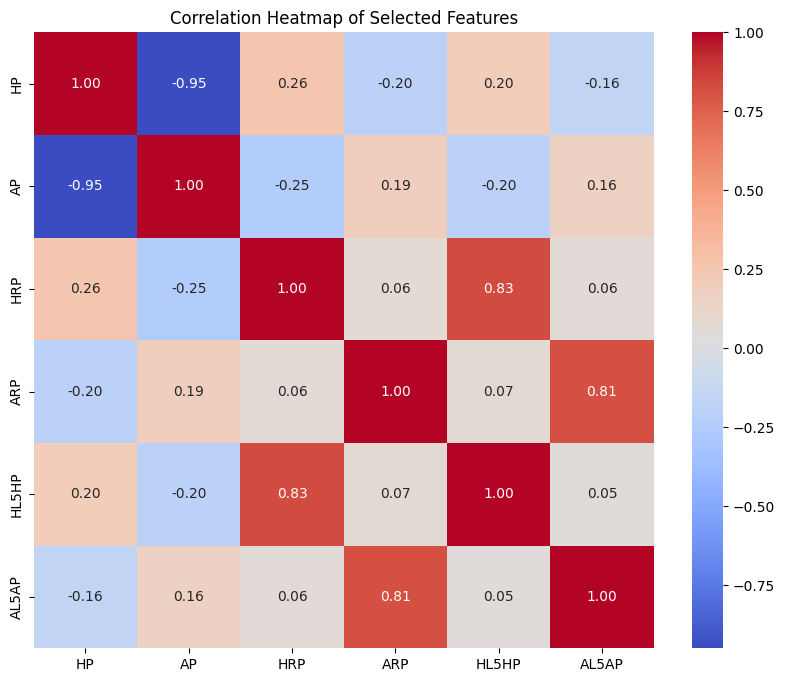

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns for the correlation heatmap
correlation_features = ['HP', 'AP', 'HRP', 'ARP', 'HL5HP', 'AL5AP']

# Calculate the correlation matrix
correlation_matrix = filtered_df[correlation_features].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Features')
plt.show()

## Two last head to head matches

In [23]:
def get_h2h_home_team_points(row, df):
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    match_order = row['MatchOrder']

    # Filter past head-to-head matches
    past_h2h_matches = df[
        (df['MatchOrder'] < match_order) &
        (
            ((df['HomeTeam'] == home_team) & (df['AwayTeam'] == away_team)) |
            ((df['HomeTeam'] == away_team) & (df['AwayTeam'] == home_team))
        )
    ].sort_values(by='MatchOrder', ascending=False)

    h2h_points_list = []
    for _, h2h_row in past_h2h_matches.head(2).iterrows():
        if h2h_row['HomeTeam'] == home_team:
            h2h_points_list.append(h2h_row['HP'])
        else:
            h2h_points_list.append(h2h_row['AP'])

    # Pad with 0s if fewer than 2 matches found
    while len(h2h_points_list) < 2:
        h2h_points_list.append(0)

    return pd.Series(h2h_points_list, index=['H2H_Home_Pts_1', 'H2H_Home_Pts_2'])

# Create a temporary DataFrame to store the individual H2H home points
h2h_home_data = filtered_df.apply(lambda row: get_h2h_home_team_points(row, filtered_df), axis=1)
h2h_home_data['MatchOrder'] = filtered_df['MatchOrder']
h2h_home_data['HomeTeam'] = filtered_df['HomeTeam']

# Calculate the sum of the last two H2H home points in the temporary DataFrame
h2h_home_data['H2H_Home_Sum_Last2Pts'] = h2h_home_data['H2H_Home_Pts_1'] + h2h_home_data['H2H_Home_Pts_2']

# Merge only the sum back to filtered_df
filtered_df = pd.merge(
    filtered_df,
    h2h_home_data[['MatchOrder', 'HomeTeam', 'H2H_Home_Sum_Last2Pts']],
    on=['MatchOrder', 'HomeTeam'],
    how='left'
)

display(filtered_df.head())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,AR,FTR,MatchOrder,HP,AP,HRP,ARP,HL5HP,AL5AP,H2H_Home_Sum_Last2Pts
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,...,0,A,1,0,3,NaN,NaN,NaN,NaN,0
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,...,0,H,2,3,0,NaN,NaN,NaN,NaN,0
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,...,0,H,3,3,0,NaN,NaN,NaN,NaN,0
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,...,0,A,4,0,3,NaN,NaN,NaN,NaN,0
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,...,0,A,5,0,3,NaN,NaN,NaN,NaN,0


In [24]:
def get_h2h_away_team_points(row, df):
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    match_order = row['MatchOrder']

    # Filter past head-to-head matches
    past_h2h_matches = df[
        (df['MatchOrder'] < match_order) &
        (
            ((df['HomeTeam'] == home_team) & (df['AwayTeam'] == away_team)) |
            ((df['HomeTeam'] == away_team) & (df['AwayTeam'] == home_team))
        )
    ].sort_values(by='MatchOrder', ascending=False)

    h2h_points_list = []
    for _, h2h_row in past_h2h_matches.head(2).iterrows():
        if h2h_row['AwayTeam'] == away_team:
            h2h_points_list.append(h2h_row['AP'])
        else:
            h2h_points_list.append(h2h_row['HP'])

    # Pad with 0s if fewer than 2 matches found
    while len(h2h_points_list) < 2:
        h2h_points_list.append(0)

    return pd.Series(h2h_points_list, index=['H2H_Away_Pts_1', 'H2H_Away_Pts_2'])

# Create a temporary DataFrame to store the individual H2H away points
h2h_away_data = filtered_df.apply(lambda row: get_h2h_away_team_points(row, filtered_df), axis=1)
h2h_away_data['MatchOrder'] = filtered_df['MatchOrder']
h2h_away_data['AwayTeam'] = filtered_df['AwayTeam']

# Calculate the sum of the last two H2H away points in the temporary DataFrame
h2h_away_data['H2H_Away_Sum_Last2Pts'] = h2h_away_data['H2H_Away_Pts_1'] + h2h_away_data['H2H_Away_Pts_2']

# Merge only the sum back to filtered_df
filtered_df = pd.merge(
    filtered_df,
    h2h_away_data[['MatchOrder', 'AwayTeam', 'H2H_Away_Sum_Last2Pts']],
    on=['MatchOrder', 'AwayTeam'],
    how='left'
)

display(filtered_df.head())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,FTR,MatchOrder,HP,AP,HRP,ARP,HL5HP,AL5AP,H2H_Home_Sum_Last2Pts,H2H_Away_Sum_Last2Pts
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,...,A,1,0,3,NaN,NaN,NaN,NaN,0,0
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,...,H,2,3,0,NaN,NaN,NaN,NaN,0,0
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,...,H,3,3,0,NaN,NaN,NaN,NaN,0,0
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,...,A,4,0,3,NaN,NaN,NaN,NaN,0,0
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,...,A,5,0,3,NaN,NaN,NaN,NaN,0,0


In [25]:
display(filtered_df.head())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,FTR,MatchOrder,HP,AP,HRP,ARP,HL5HP,AL5AP,H2H_Home_Sum_Last2Pts,H2H_Away_Sum_Last2Pts
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,...,A,1,0,3,NaN,NaN,NaN,NaN,0,0
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,...,H,2,3,0,NaN,NaN,NaN,NaN,0,0
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,...,H,3,3,0,NaN,NaN,NaN,NaN,0,0
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,...,A,4,0,3,NaN,NaN,NaN,NaN,0,0
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,...,A,5,0,3,NaN,NaN,NaN,NaN,0,0


## Another Correlation

In [26]:
ftr_mapping = {'H': 0, 'D': 1, 'A': 2}
filtered_df['FTR_encoded'] = filtered_df['FTR'].map(ftr_mapping)
display(filtered_df[['FTR', 'FTR_encoded']].head())

,FTR,FTR_encoded
0,A,2
1,H,0
2,H,0
3,A,2
4,A,2


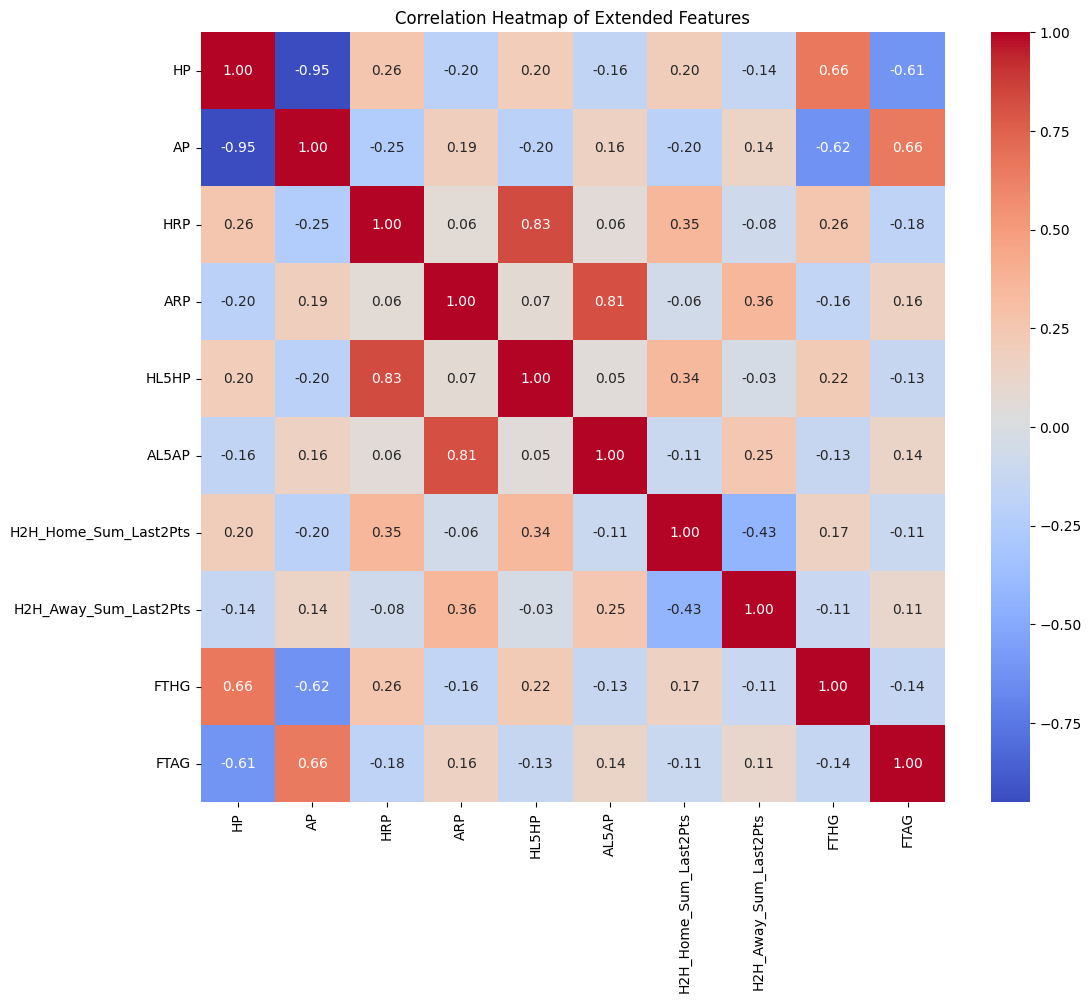

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns for the correlation heatmap
correlation_features_extended = ['HP', 'AP', 'HRP', 'ARP', 'HL5HP', 'AL5AP', 'H2H_Home_Sum_Last2Pts', 'H2H_Away_Sum_Last2Pts', 'FTHG', 'FTAG']

# Calculate the correlation matrix for the extended features
correlation_matrix_extended = filtered_df[correlation_features_extended].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_extended, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Extended Features')
plt.show()

## Correlation with target

In [28]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(x, y):
    """
    Calculates Cramer's V statistic for two categorical variables.
    """
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    r_minus_1, c_minus_1 = contingency_table.shape[0] - 1, contingency_table.shape[1] - 1

    # Handle cases where min(r_minus_1, c_minus_1) is zero
    min_dim = min(r_minus_1, c_minus_1)
    if min_dim == 0:
        return np.nan # Cramer's V is undefined if one variable has only one category

    v = np.sqrt(chi2 / (n * min_dim))
    return v

print("Cramer's V function defined.")

Cramer's V function defined.


In [29]:
cramers_v_referee_ftr = cramers_v(filtered_df['Referee'], filtered_df['FTR'])
print(f"Cramer's V between Referee and FTR: {cramers_v_referee_ftr:.4f}")

Cramer's V between Referee and FTR: 0.1461


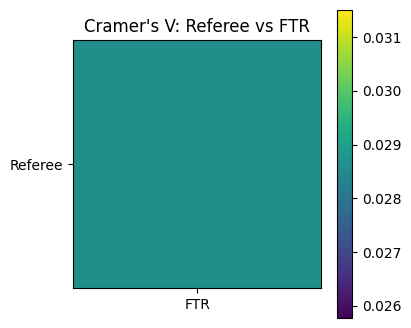

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# ---- Cramer's V function ----
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape

    # Bias correction
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)

    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


# ---- Compute Cramer's V between the two categorical features ----
cv = cramers_v(filtered_df["Referee"], filtered_df["FTR"])

# ---- Create a 1×1 heatmap ----
heatmap_matrix = np.array([[cv]])

plt.figure(figsize=(4, 4))
plt.imshow(heatmap_matrix)
plt.colorbar()
plt.title("Cramer's V: Referee vs FTR")

plt.xticks([0], ["FTR"])
plt.yticks([0], ["Referee"])

plt.show()

##

In [31]:
contingency_table_therapy = pd.crosstab(filtered_df['FTR'], filtered_df['Referee'])

In [32]:
chi2_therapy, p_therapy, dof_therapy, expected_therapy = chi2_contingency(contingency_table_therapy)

In [33]:
print(f"Chi-squared statistic (FTR vs Referee): {chi2_therapy}")

Chi-squared statistic (FTR vs Referee): 81.1545999418704


In [34]:
print(f"P-value (FTR vs Referee): {p_therapy:.30f}")

P-value (FTR vs Referee): 0.381145089925894964277830467836


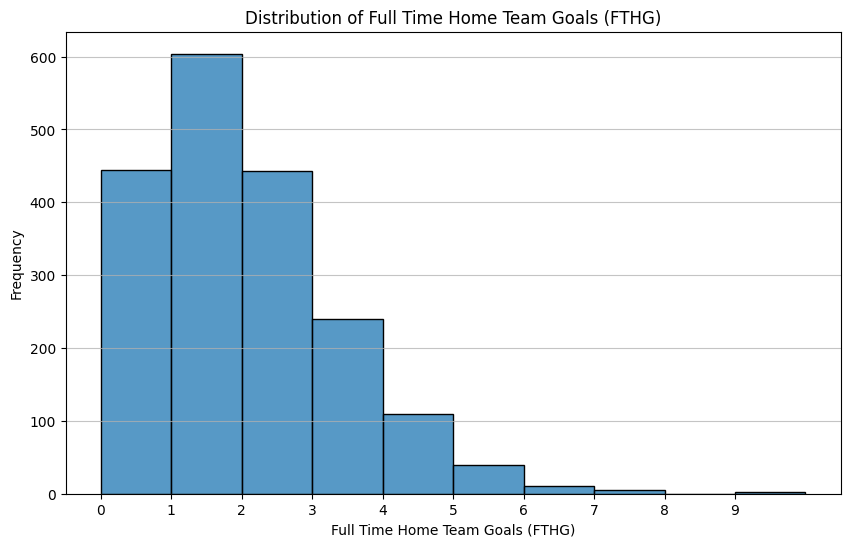

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['FTHG'], bins=range(filtered_df['FTHG'].min(), filtered_df['FTHG'].max() + 2), kde=False, edgecolor='black')
plt.title('Distribution of Full Time Home Team Goals (FTHG)')
plt.xlabel('Full Time Home Team Goals (FTHG)')
plt.ylabel('Frequency')
plt.xticks(range(filtered_df['FTHG'].min(), filtered_df['FTHG'].max() + 1))
plt.grid(axis='y', alpha=0.75)
plt.show()

In [36]:
from scipy.stats import kruskal

# Split FTHG values into groups based on FTR category
group_H = filtered_df.loc[filtered_df["FTR"] == "H", "FTHG"]
group_A = filtered_df.loc[filtered_df["FTR"] == "A", "FTHG"]
group_D = filtered_df.loc[filtered_df["FTR"] == "D", "FTHG"]

# Perform Kruskal–Wallis test
stat, p = kruskal(group_H, group_A, group_D)

print("Kruskal–Wallis H-test")
print(f"H statistic: {stat:.4f}")
print(f"p-value: {p:.6f}")

Kruskal–Wallis H-test
H statistic: 937.2058
p-value: 0.000000


# Distribution of Features

# Task
Create a global Python function that takes a DataFrame and a column name as input, and plots the distribution of the specified column using either a histogram (for numerical data) or a countplot (for categorical data, handling many unique values by possibly using a horizontal plot or limiting entries). Then, iterate through each column in `filtered_df` (excluding 'MatchOrder') and generate a new code cell to call this plotting function for each column to visualize its distribution.

## Define a global plotting function

### Subtask:
Create a Python function `plot_column_distribution` that takes a DataFrame and a column name as input. This function should automatically determine if the column is numerical or categorical and plot its distribution using a histogram for numerical data or a countplot for categorical data. For categorical columns with many unique values, consider plotting horizontally or limiting the number of displayed categories for better readability.


**Reasoning**:
I will define the `plot_column_distribution` function as requested. This function will first import `matplotlib.pyplot` and `seaborn`, then check the column's data type, and plot either a histogram for numerical data or a countplot for categorical data, handling a large number of unique categorical values by limiting to the top 10 and plotting horizontally.



In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_column_distribution(df, column_name):
    """
    Plots the distribution of a specified column in a DataFrame.
    Automatically determines if the column is numerical or categorical
    and plots a histogram or countplot accordingly.
    """
    plt.figure(figsize=(10, 6))

    # Determine if the column is numerical or categorical
    if pd.api.types.is_numeric_dtype(df[column_name]):
        # Numerical column: plot histogram
        sns.histplot(df[column_name], kde=True)
        plt.title(f'Distribution of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
    else:
        # Categorical column: plot countplot
        unique_values = df[column_name].nunique()
        if unique_values > 10: # If many unique values, consider top 10 and horizontal plot
            # Get top 10 most frequent categories
            top_categories = df[column_name].value_counts().nlargest(10).index
            df_to_plot = df[df[column_name].isin(top_categories)]
            sns.countplot(data=df_to_plot, y=column_name, order=top_categories)
            plt.title(f'Top 10 Most Frequent {column_name}')
            plt.ylabel(column_name)
            plt.xlabel('Count')
        else:
            # Plot all categories vertically
            sns.countplot(data=df, x=column_name, order=df[column_name].value_counts().index)
            plt.title(f'Distribution of {column_name}')
            plt.xlabel(column_name)
            plt.ylabel('Count')

        plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

print("plot_column_distribution function defined.")

plot_column_distribution function defined.


**Reasoning**:
Now that the `plot_column_distribution` function is defined, I will iterate through each column in `filtered_df` (excluding 'MatchOrder') and call this function to visualize the distribution of each feature. This helps in understanding the data's characteristics.



Plotting distribution for column: HomeTeam


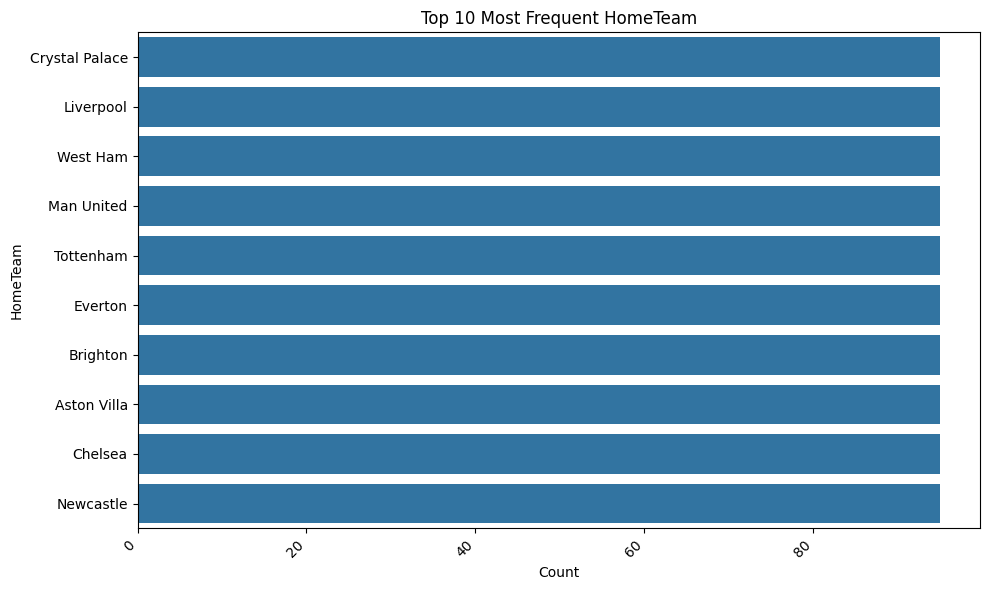

Plotting distribution for column: AwayTeam


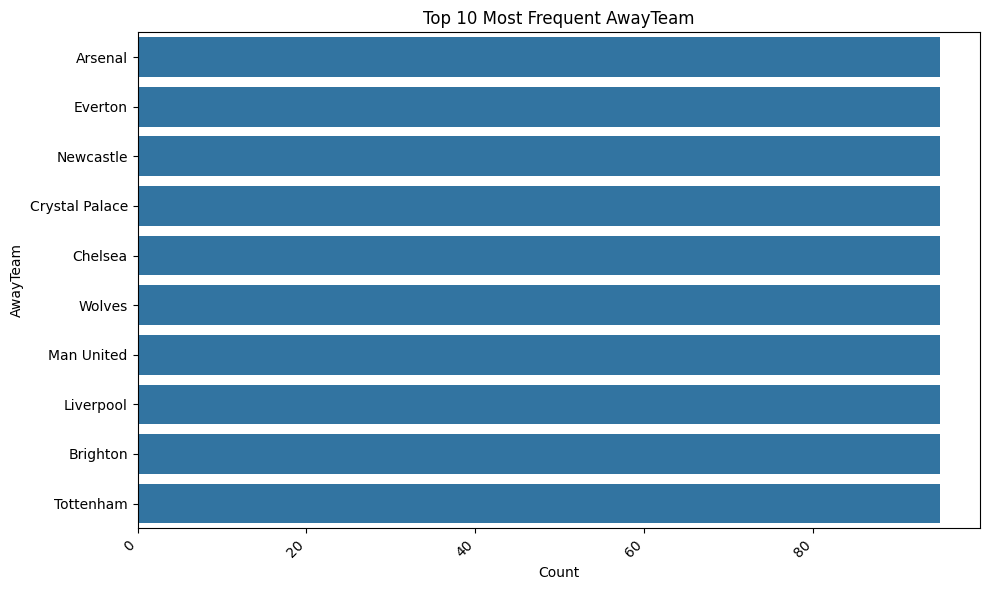

Plotting distribution for column: FTHG


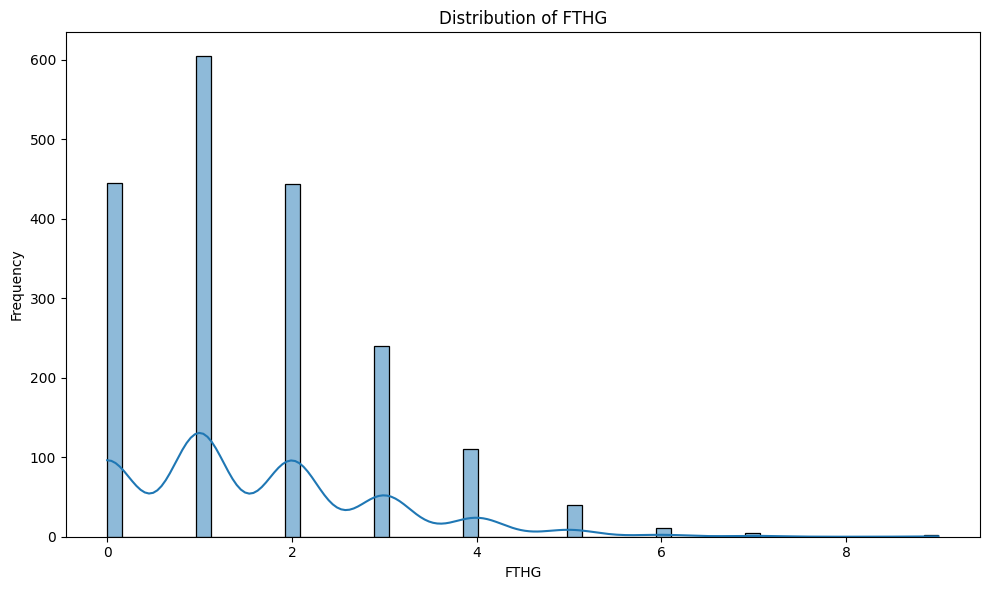

Plotting distribution for column: FTAG


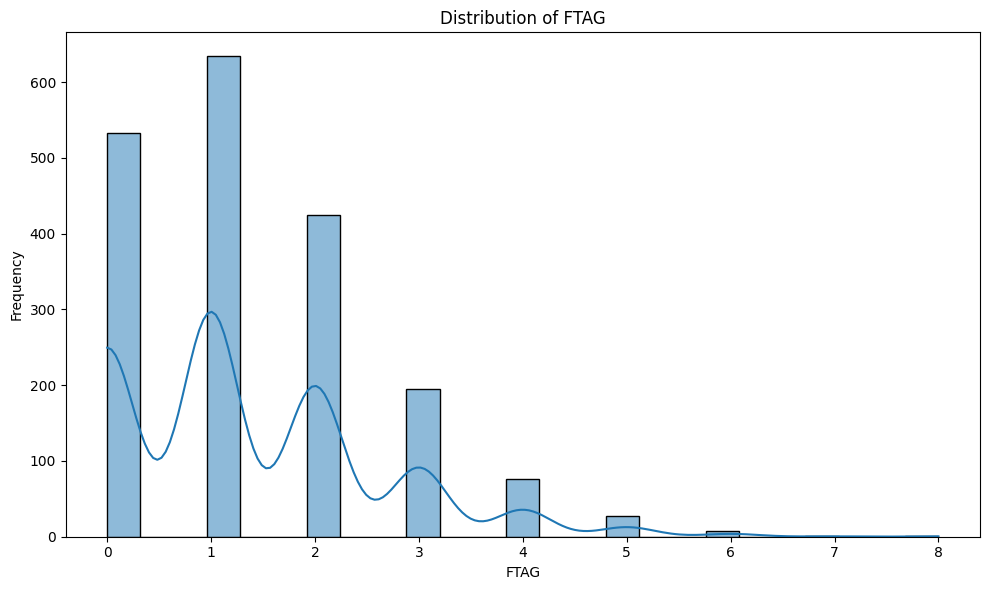

Plotting distribution for column: HTHG


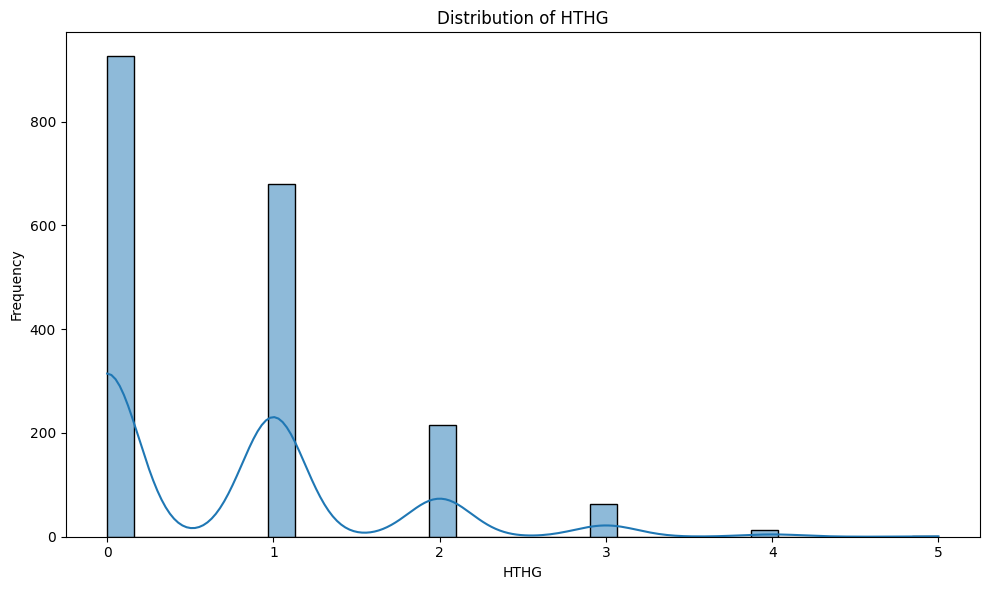

Plotting distribution for column: HTAG


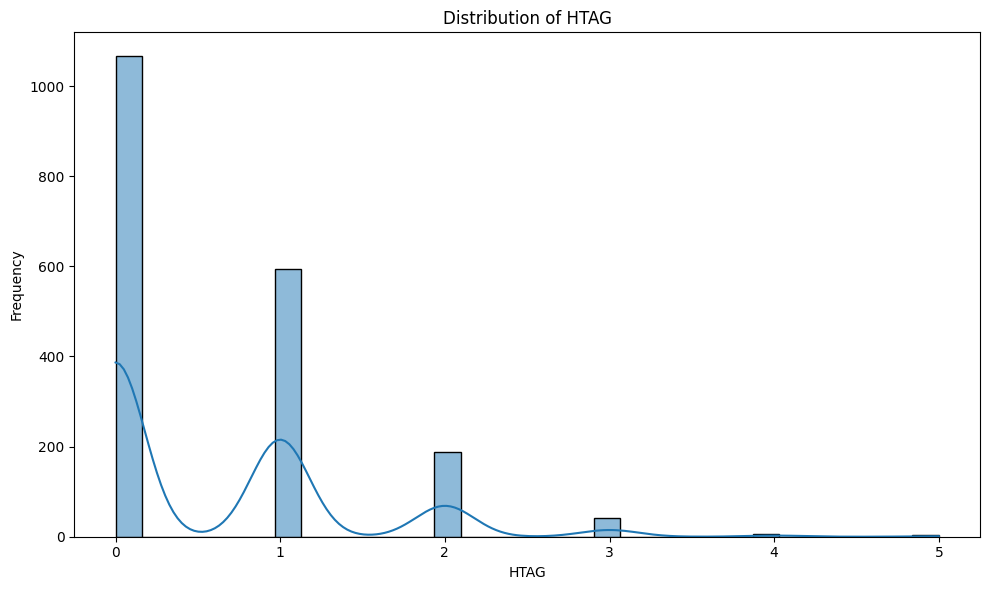

Plotting distribution for column: HTR


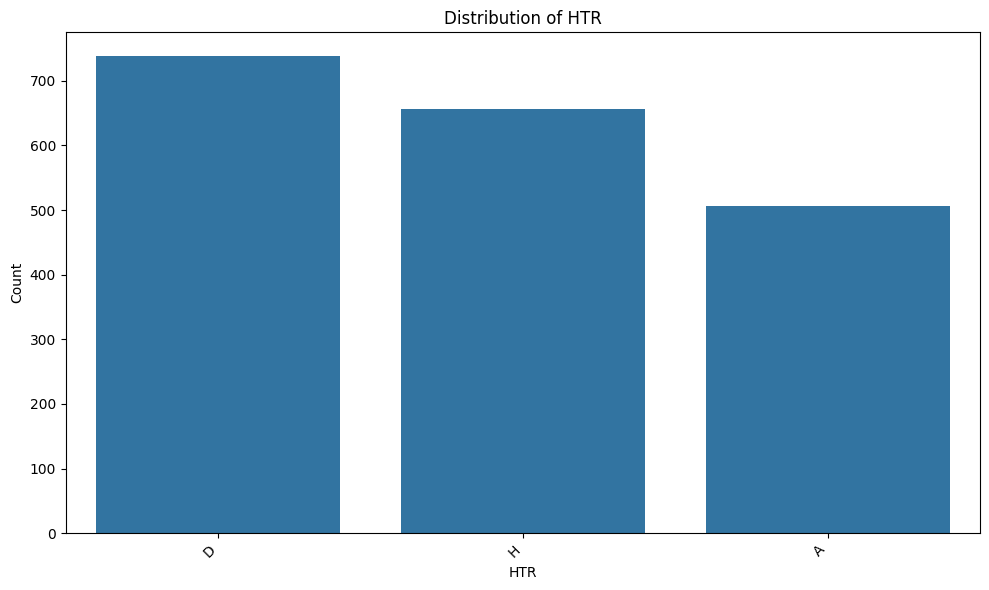

Plotting distribution for column: Referee


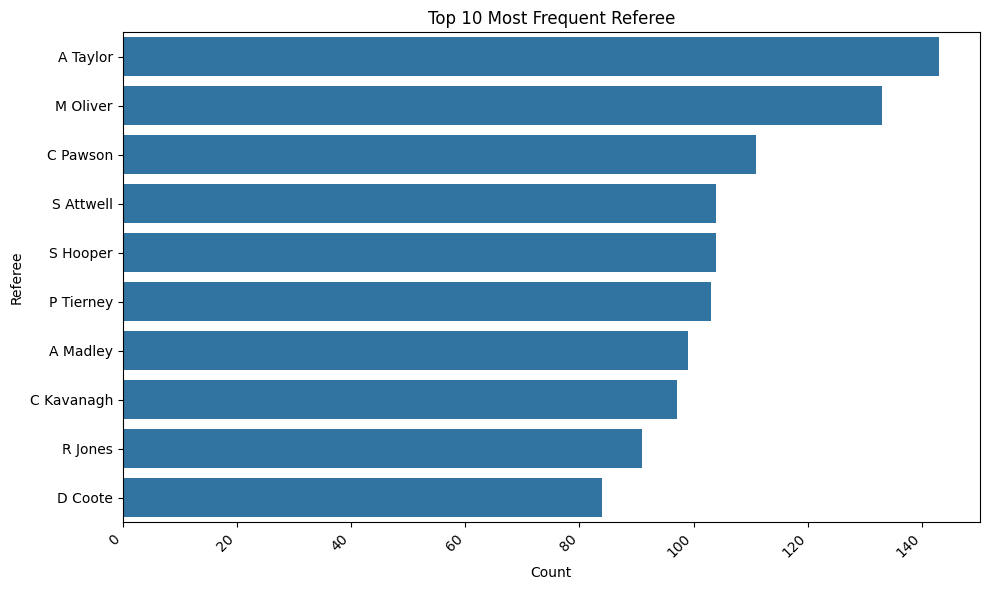

Plotting distribution for column: HS


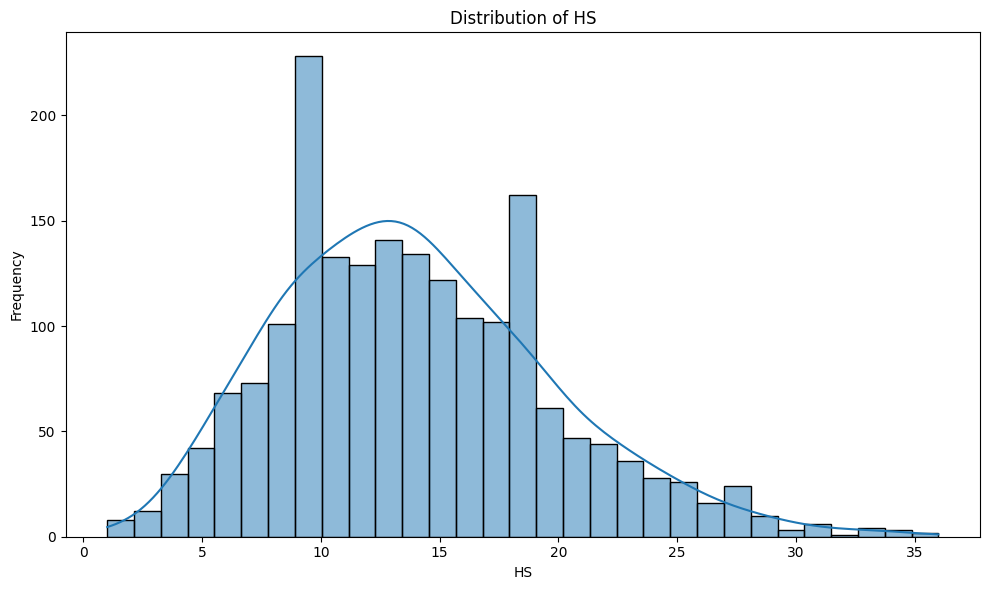

Plotting distribution for column: AS


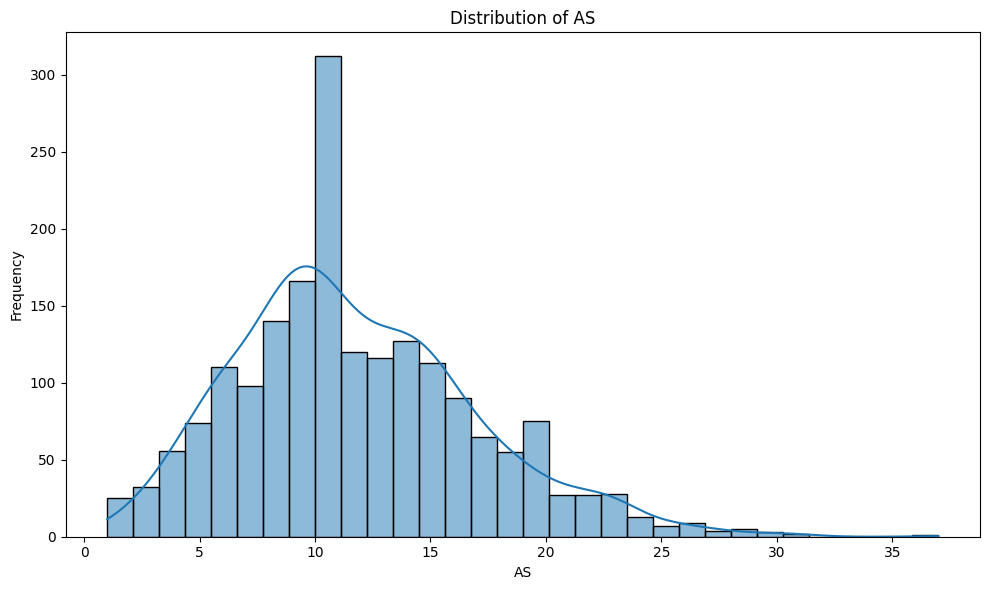

Plotting distribution for column: HST


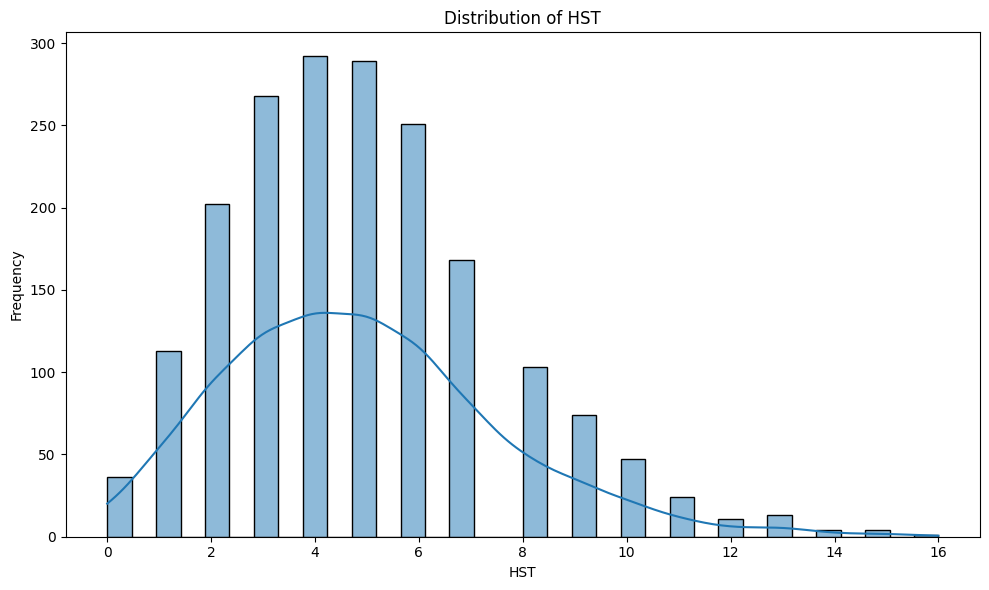

Plotting distribution for column: AST


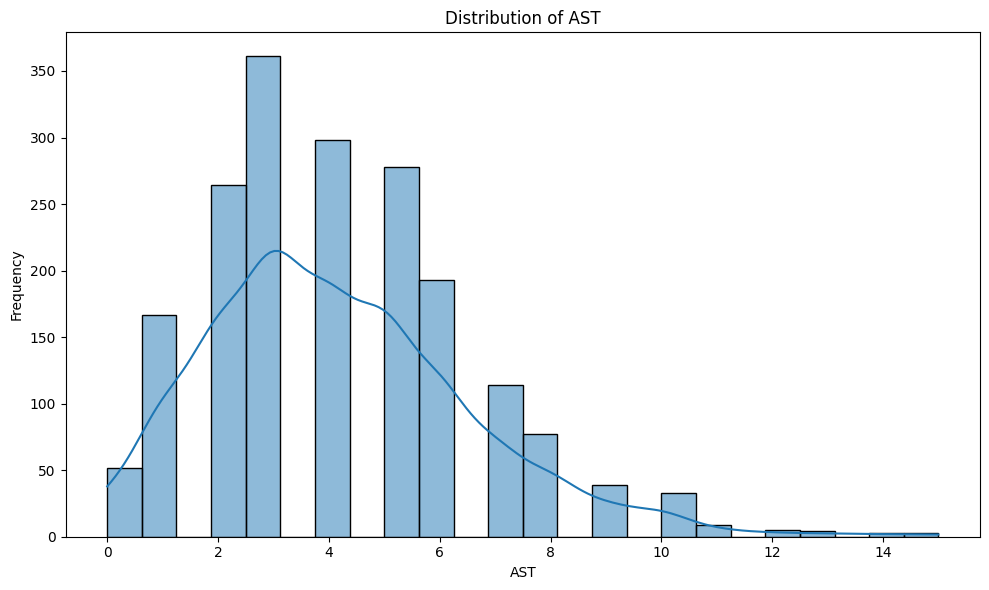

Plotting distribution for column: HF


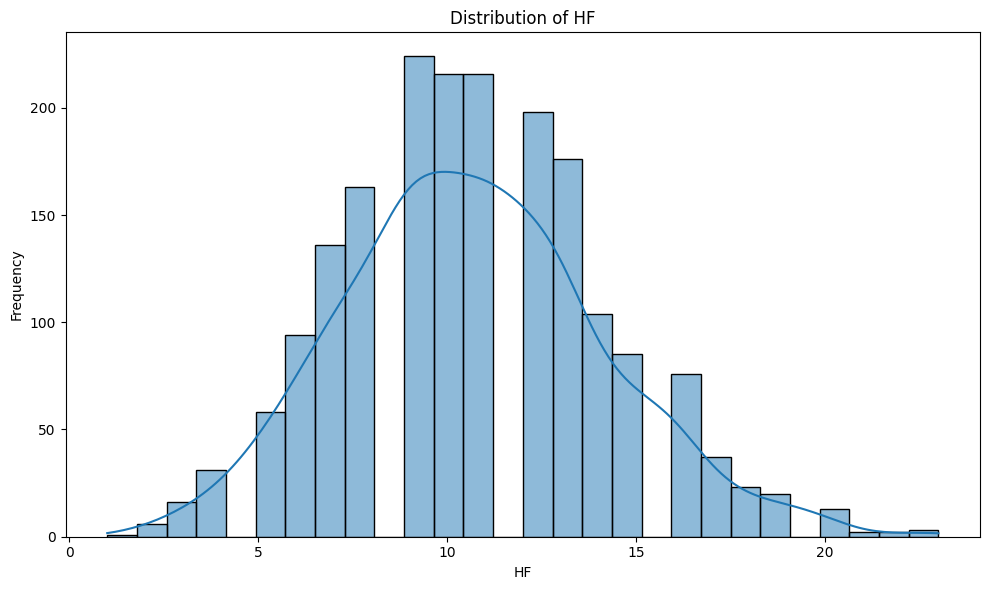

Plotting distribution for column: AF


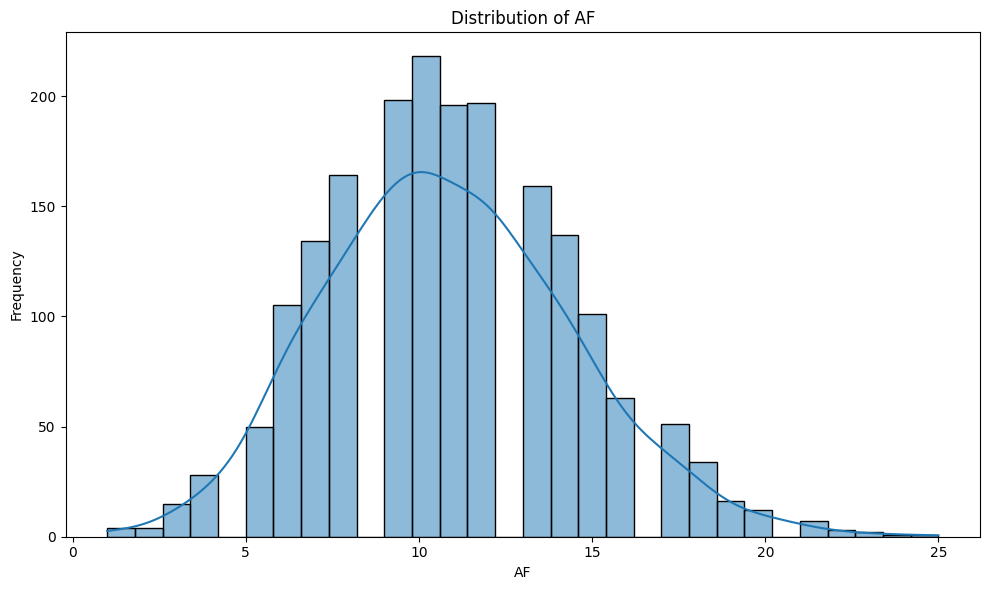

Plotting distribution for column: HC


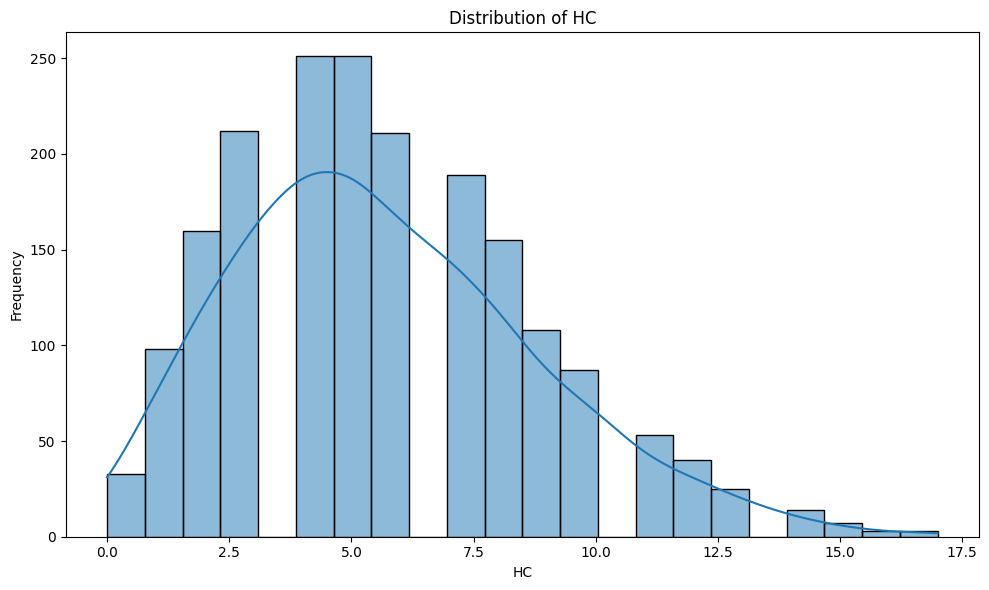

Plotting distribution for column: AC


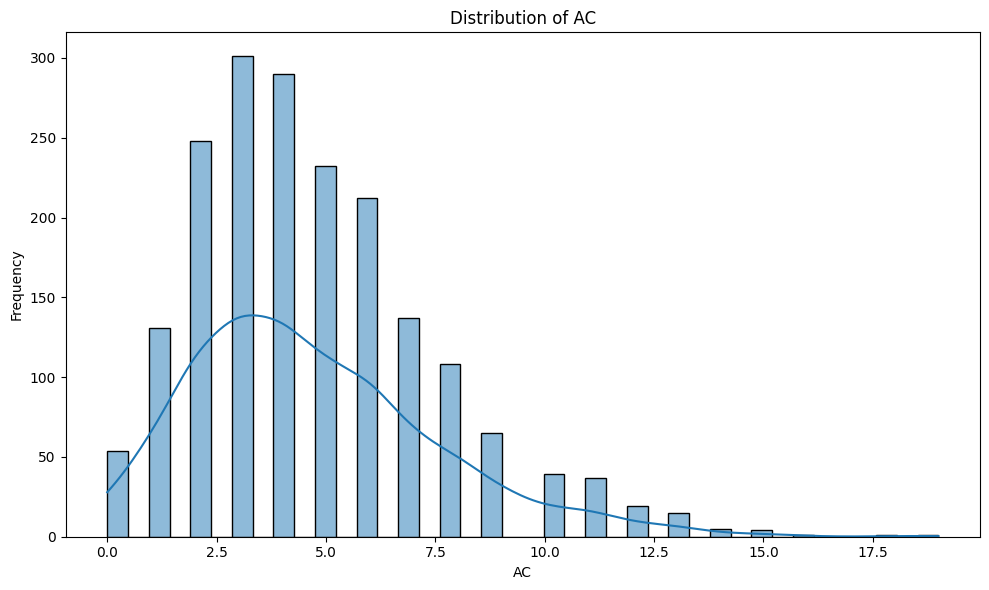

Plotting distribution for column: HY


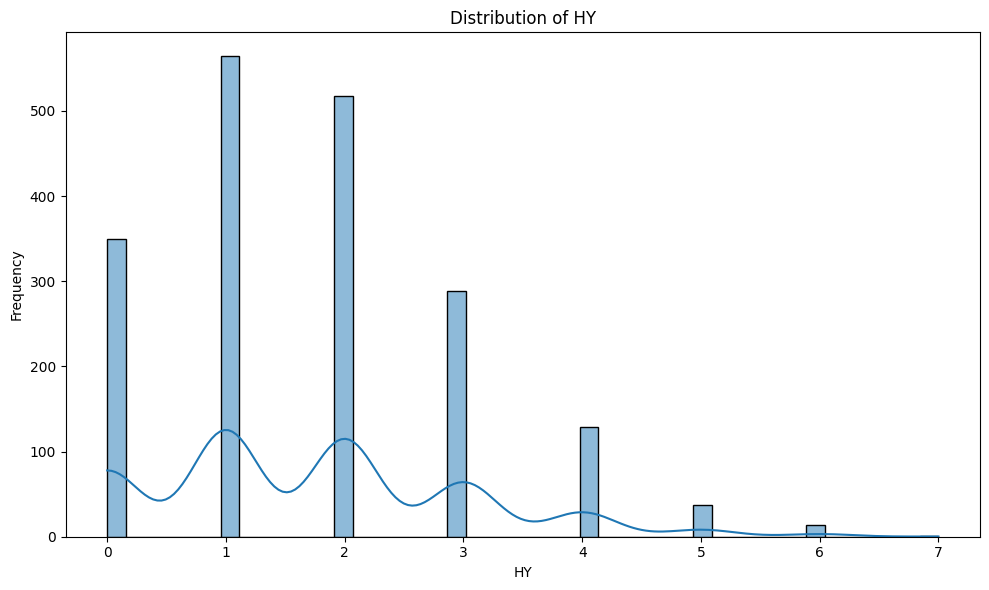

Plotting distribution for column: AY


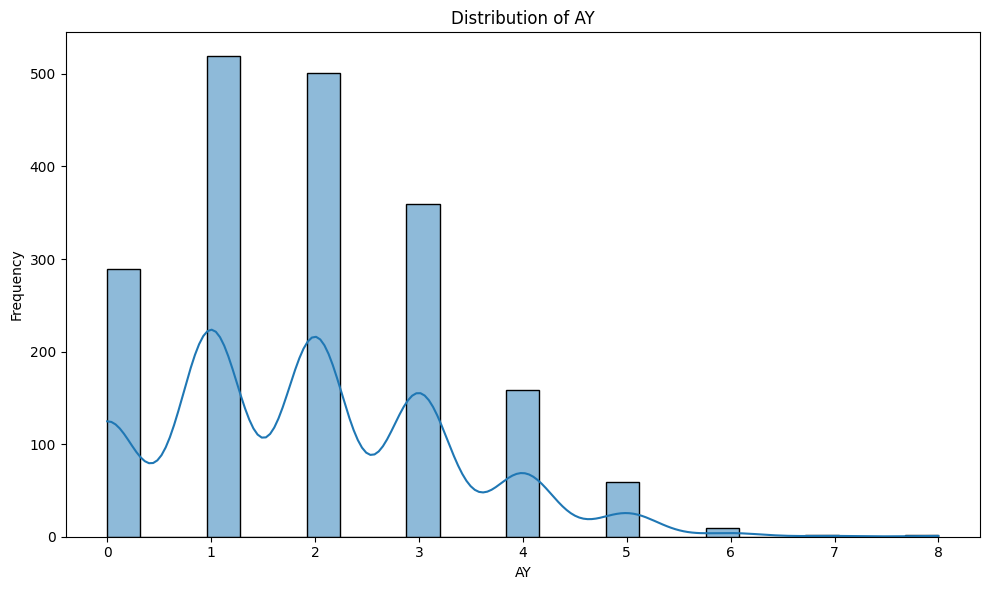

Plotting distribution for column: HR


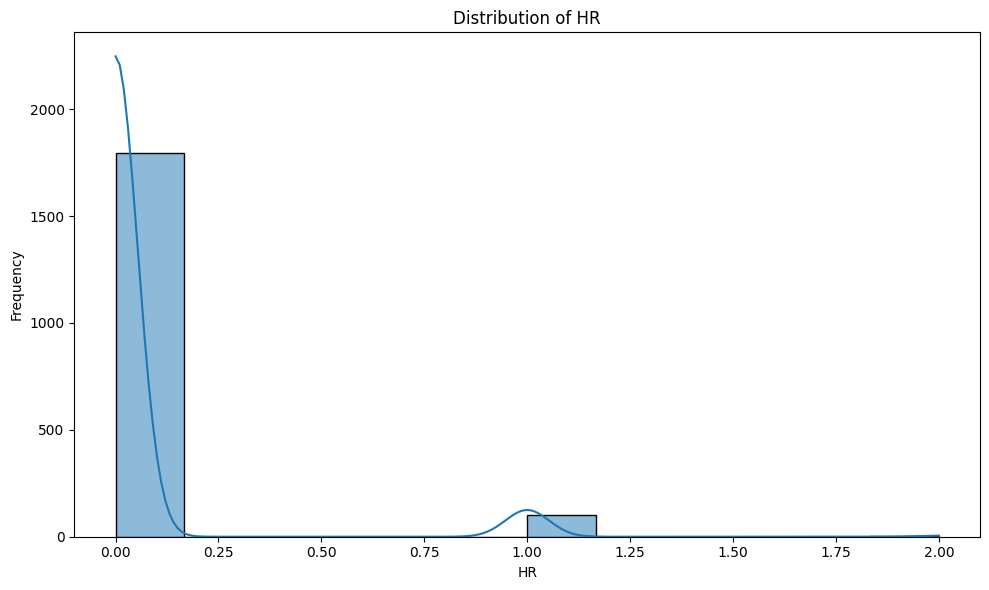

Plotting distribution for column: AR


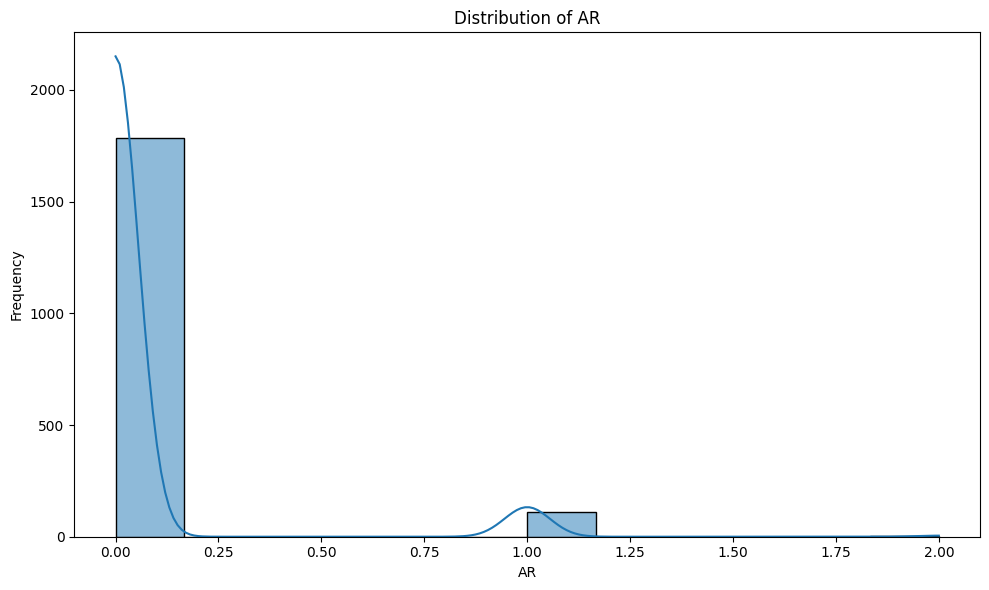

Plotting distribution for column: FTR


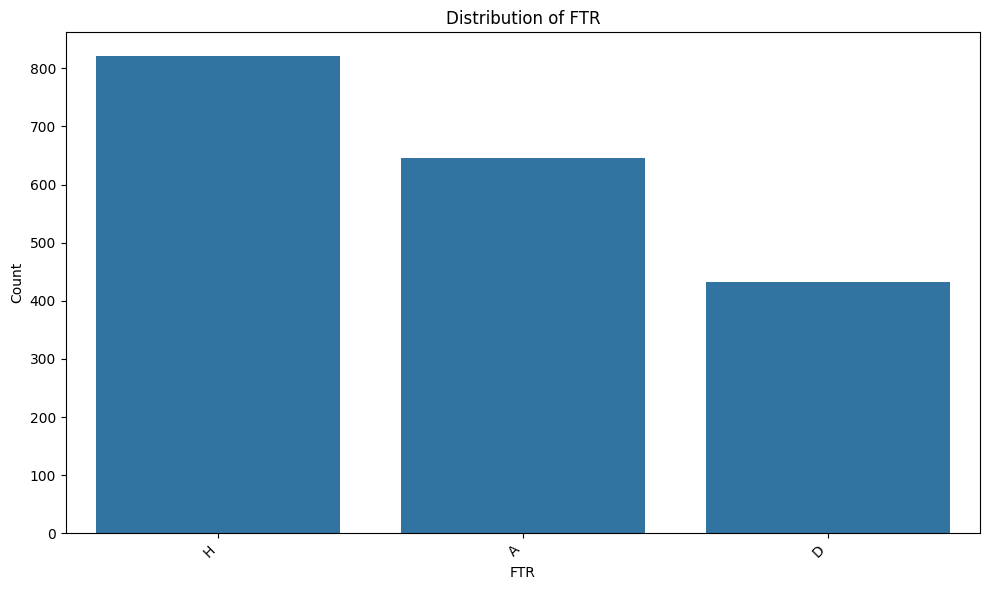

Plotting distribution for column: HP


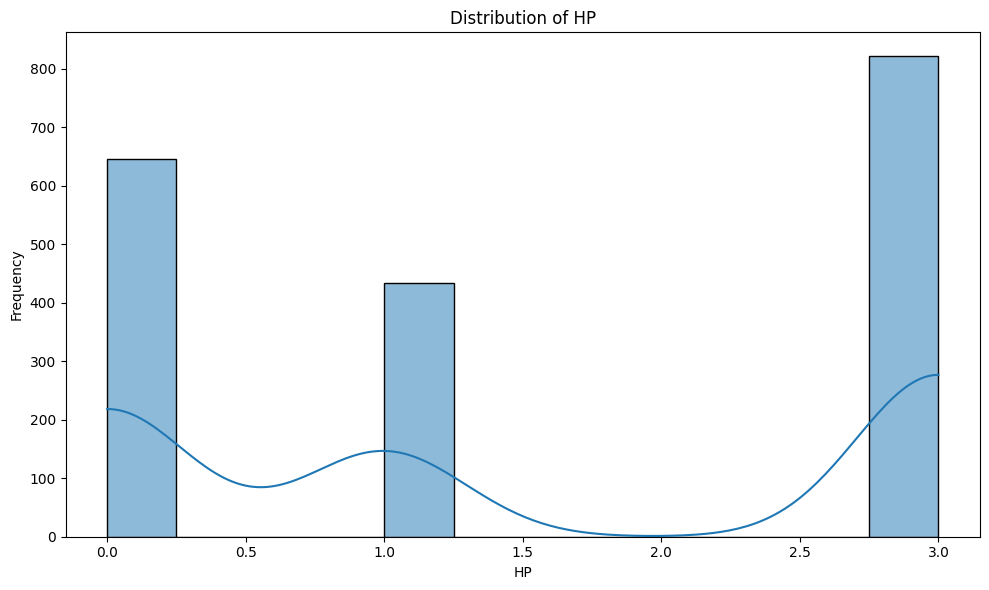

Plotting distribution for column: AP


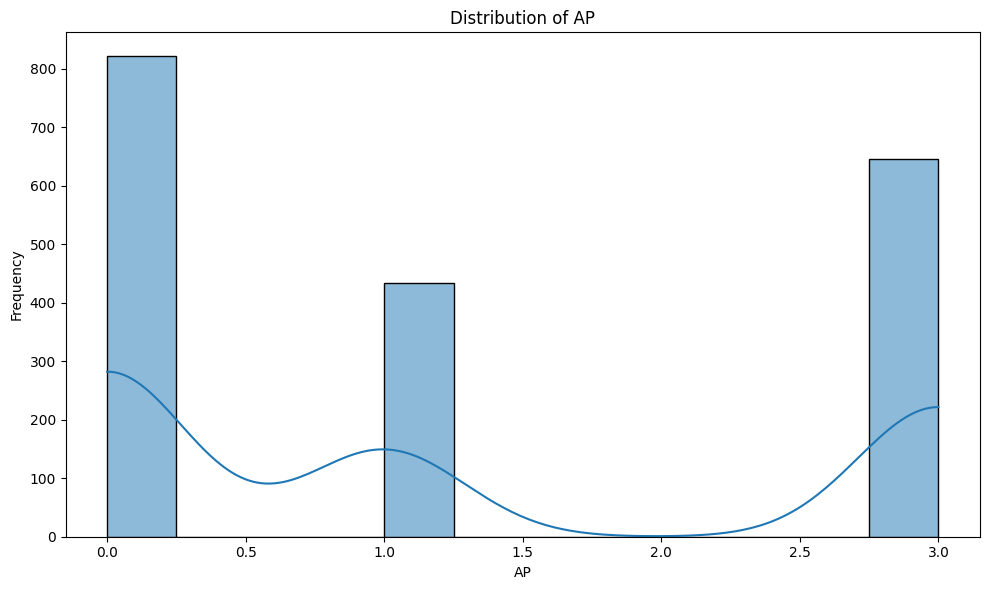

Plotting distribution for column: HRP


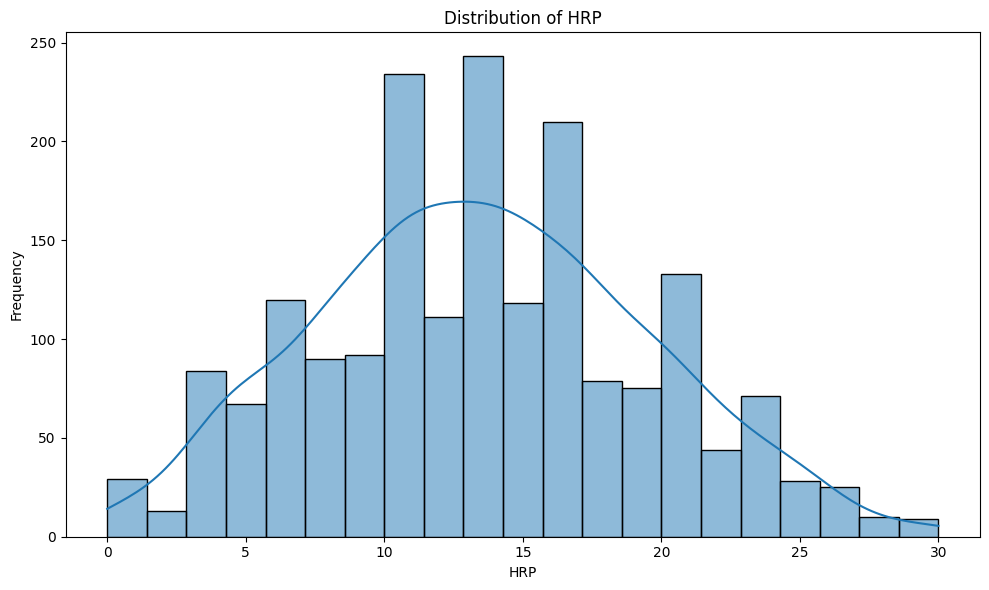

Plotting distribution for column: ARP


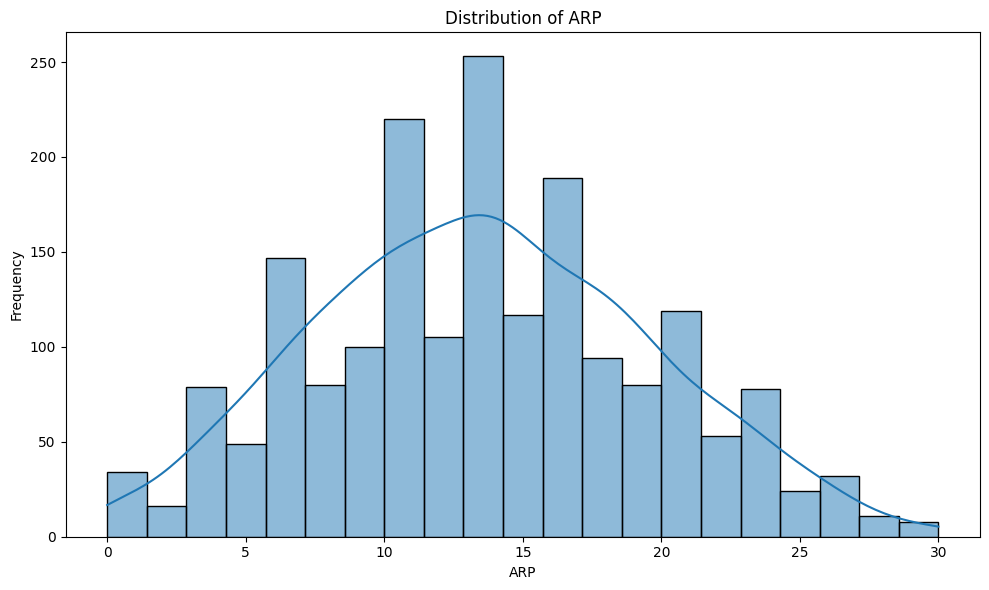

Plotting distribution for column: HL5HP


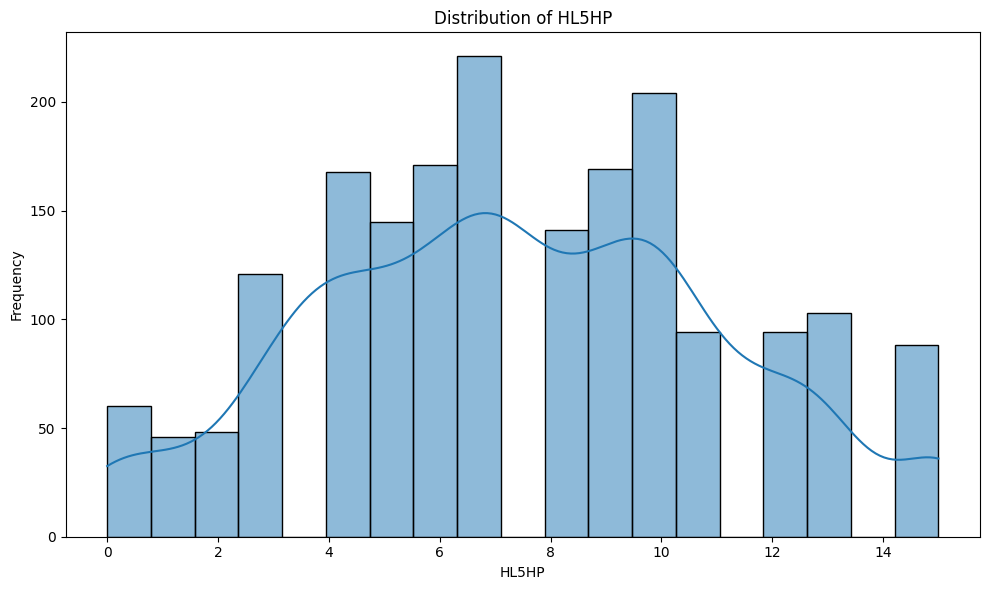

Plotting distribution for column: AL5AP


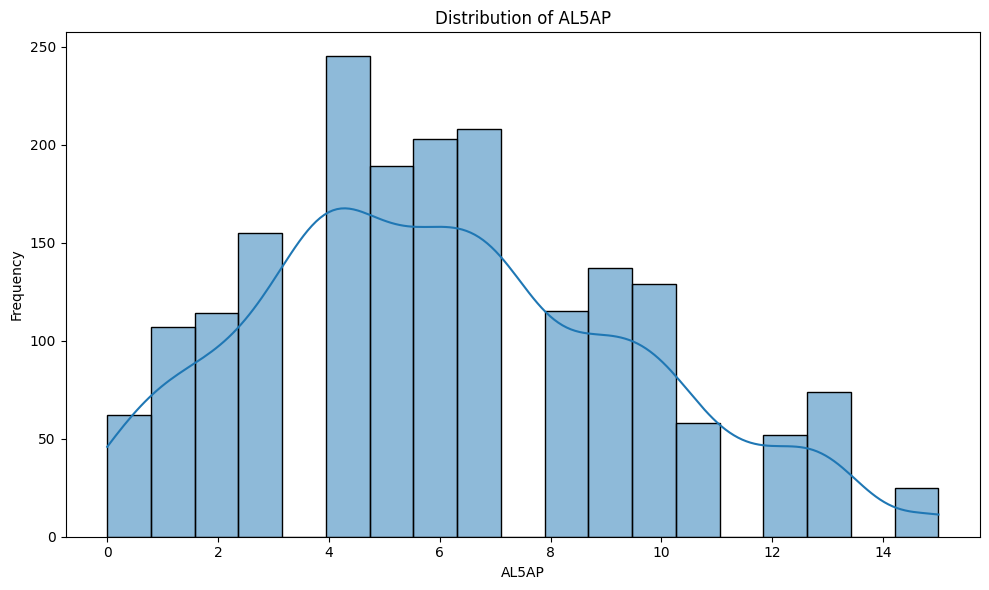

Plotting distribution for column: H2H_Home_Sum_Last2Pts


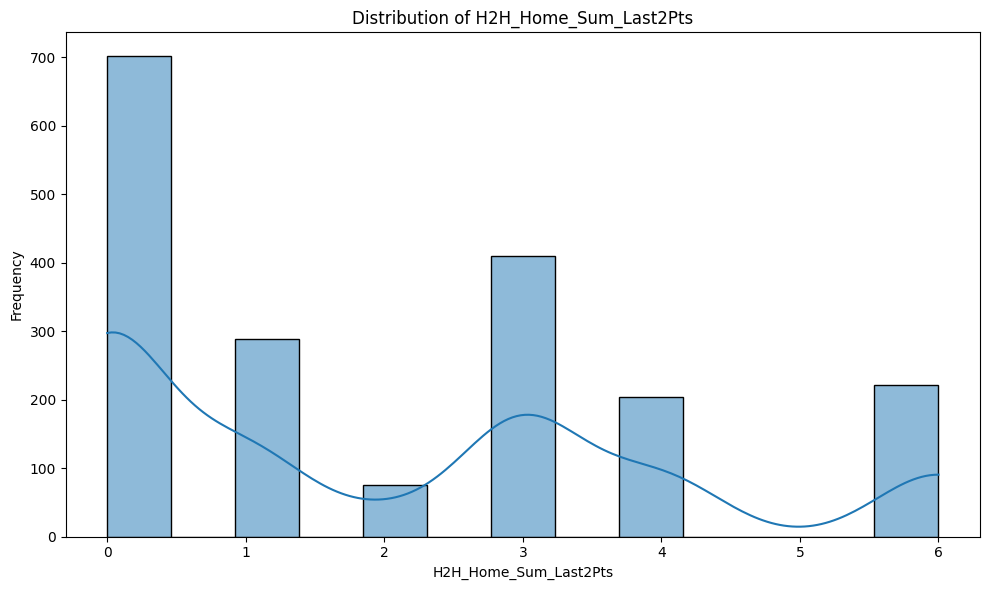

Plotting distribution for column: H2H_Away_Sum_Last2Pts


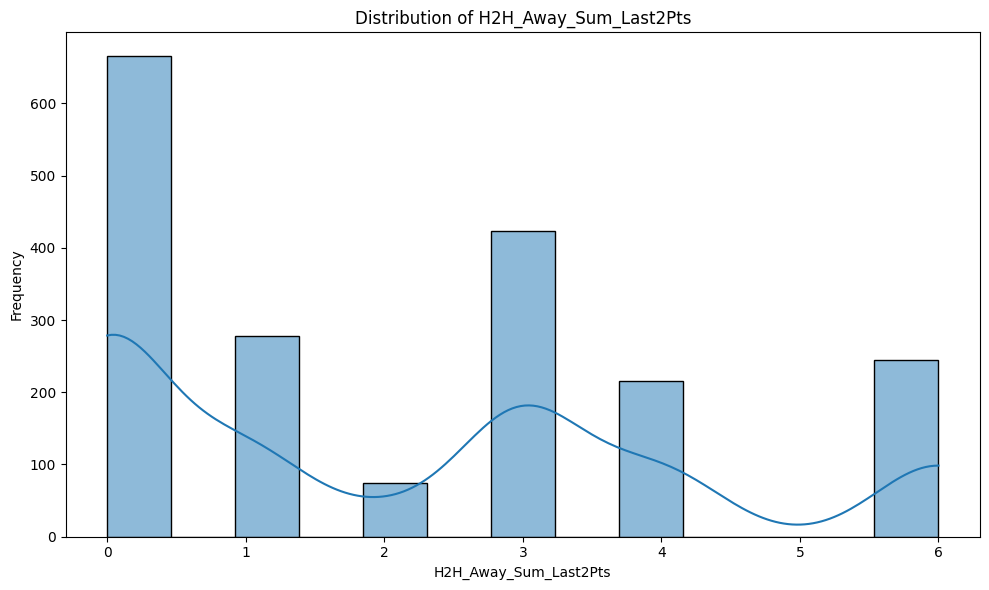

Plotting distribution for column: FTR_encoded


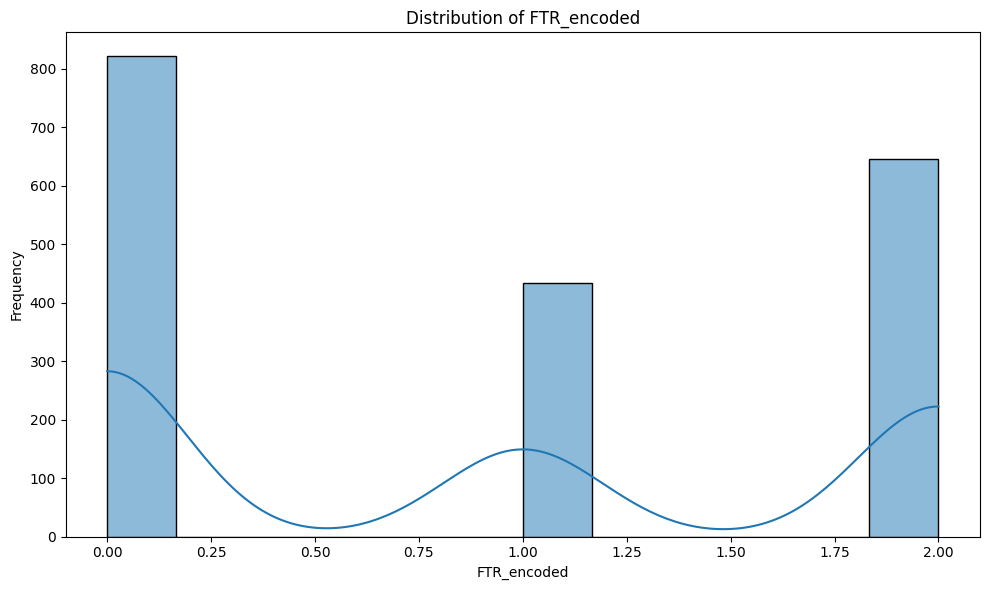

In [38]:
columns_to_plot = [col for col in filtered_df.columns if col != 'MatchOrder']

for column in columns_to_plot:
    print(f"Plotting distribution for column: {column}")
    plot_column_distribution(filtered_df, column)

# Task
Perform the Shapiro-Wilk test for normality on all numerical columns in `filtered_df` (excluding 'HTR', 'FTR', 'HP', 'AP', 'FTR_encoded'), displaying the W-statistic and p-value for each, and handling cases with too few non-constant values.

## Identify numerical columns for Shapiro-Wilk test

### Subtask:
Filter the `filtered_df` to identify all columns that are numerical and are not in the exclusion list (HTR, FTR, HP, AP, FTR_encoded). These are the columns on which the Shapiro-Wilk test will be performed.


**Reasoning**:
I will define the exclusion list, iterate through the columns of `filtered_df`, identify numerical columns that are not in the exclusion list, and then print the collected column names.



In [39]:
exclusion_list = ['HTR', 'FTR', 'HP', 'AP', 'FTR_encoded']
numerical_cols_for_shapiro = []

for col in filtered_df.columns:
    if pd.api.types.is_numeric_dtype(filtered_df[col]) and col not in exclusion_list:
        numerical_cols_for_shapiro.append(col)

print(f"Columns identified for Shapiro-Wilk test: {numerical_cols_for_shapiro}")

Columns identified for Shapiro-Wilk test: ['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'MatchOrder', 'HRP', 'ARP', 'HL5HP', 'AL5AP', 'H2H_Home_Sum_Last2Pts', 'H2H_Away_Sum_Last2Pts']


## Define Shapiro-Wilk test function

### Subtask:
Create a Python function that takes a DataFrame column (Series) as input, performs the Shapiro-Wilk test using `scipy.stats.shapiro`, and prints the W-statistic and p-value. This function should also handle cases where the test cannot be performed (e.g., too few non-constant values).


**Reasoning**:
I will define the `perform_shapiro_wilk_test` function, which will handle edge cases for the Shapiro-Wilk test and print the results or an appropriate message.



In [40]:
from scipy.stats import shapiro

def perform_shapiro_wilk_test(column_data):
    """
    Performs the Shapiro-Wilk test for normality on a DataFrame column (Series).
    Handles cases where the test cannot be performed.
    """
    # Drop NaN values as shapiro test does not handle them
    cleaned_data = column_data.dropna()

    # Check if there are enough samples (Shapiro-Wilk requires at least 3 samples)
    if len(cleaned_data) < 3:
        print(f"  Shapiro-Wilk test cannot be performed: Not enough samples (n={len(cleaned_data)}).")
        return

    # Check if all values are constant (Shapiro-Wilk requires variance)
    if cleaned_data.nunique() < 2:
        print(f"  Shapiro-Wilk test cannot be performed: Data is constant (nunique={cleaned_data.nunique()}).")
        return

    try:
        stat, p = shapiro(cleaned_data)
        print(f"  Shapiro-Wilk Test: W-statistic={stat:.4e}, p-value={p:.4e}")
    except ValueError as e:
        print(f"  Shapiro-Wilk test encountered an error: {e}")

print("perform_shapiro_wilk_test function defined.")

perform_shapiro_wilk_test function defined.


**Reasoning**:
Now that the `perform_shapiro_wilk_test` function is defined, I will iterate through the previously identified numerical columns and apply this function to each one, displaying the Shapiro-Wilk test results.



In [41]:
for col in numerical_cols_for_shapiro:
    print(f"Performing Shapiro-Wilk test for column: {col}")
    perform_shapiro_wilk_test(filtered_df[col])

Performing Shapiro-Wilk test for column: FTHG
  Shapiro-Wilk Test: W-statistic=8.8178e-01, p-value=8.7524e-36
Performing Shapiro-Wilk test for column: FTAG
  Shapiro-Wilk Test: W-statistic=8.6741e-01, p-value=2.1983e-37
Performing Shapiro-Wilk test for column: HTHG
  Shapiro-Wilk Test: W-statistic=7.6833e-01, p-value=1.0746e-45
Performing Shapiro-Wilk test for column: HTAG
  Shapiro-Wilk Test: W-statistic=7.2586e-01, p-value=2.2605e-48
Performing Shapiro-Wilk test for column: HS
  Shapiro-Wilk Test: W-statistic=9.7793e-01, p-value=1.5296e-16
Performing Shapiro-Wilk test for column: AS
  Shapiro-Wilk Test: W-statistic=9.7288e-01, p-value=1.7573e-18
Performing Shapiro-Wilk test for column: HST
  Shapiro-Wilk Test: W-statistic=9.5971e-01, p-value=1.5212e-22
Performing Shapiro-Wilk test for column: AST
  Shapiro-Wilk Test: W-statistic=9.4694e-01, p-value=1.2676e-25
Performing Shapiro-Wilk test for column: HF
  Shapiro-Wilk Test: W-statistic=9.8768e-01, p-value=1.1069e-11
Performing Shapiro

In [42]:
numerical_cols_for_kruskal = []
exclusion_list_kruskal = ['FTR', 'FTR_encoded', 'MatchOrder', 'HP', 'AP', 'HTR']

for col in filtered_df.columns:
    if pd.api.types.is_numeric_dtype(filtered_df[col]) and col not in exclusion_list_kruskal:
        numerical_cols_for_kruskal.append(col)

print(f"Columns identified for Kruskal-Wallis test: {numerical_cols_for_kruskal}")

Columns identified for Kruskal-Wallis test: ['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'HRP', 'ARP', 'HL5HP', 'AL5AP', 'H2H_Home_Sum_Last2Pts', 'H2H_Away_Sum_Last2Pts']


In [43]:
!pip install scikit-posthocs

In [44]:
import scikit_posthocs as sp

for col in numerical_cols_for_kruskal:
    print(f"\nDunn's post-hoc test for column: {col}")
    # Perform Dunn's post-hoc test
    # Using 'holm' for Bonferroni correction as per common practice with Dunn's test,
    # although the prompt specified 'Bonferroni' which is a type of p-value adjustment method.
    # scikit-posthocs' 'bonferroni' argument directly applies the Bonferroni correction.
    try:
        dunn_results = sp.posthoc_dunn(filtered_df, val_col=col, group_col='FTR_encoded', p_adjust='bonferroni')
        print(dunn_results)
    except ValueError as e:
        print(f"  Could not perform Dunn's test for {col}: {e}")
    except Exception as e:
        print(f"  An unexpected error occurred for {col}: {e}")


Dunn's post-hoc test for column: FTHG
               0             1              2
0   1.000000e+00  4.236669e-71  2.475152e-195
1   4.236669e-71  1.000000e+00   9.191795e-16
2  2.475152e-195  9.191795e-16   1.000000e+00

Dunn's post-hoc test for column: FTAG
               0             1              2
0   1.000000e+00  6.381200e-18  1.865026e-186
1   6.381200e-18  1.000000e+00   1.971876e-59
2  1.865026e-186  1.971876e-59   1.000000e+00

Dunn's post-hoc test for column: HTHG
              0             1             2
0  1.000000e+00  4.703966e-30  1.922732e-78
1  4.703966e-30  1.000000e+00  2.294114e-06
2  1.922732e-78  2.294114e-06  1.000000e+00

Dunn's post-hoc test for column: HTAG
              0             1             2
0  1.000000e+00  4.472572e-05  2.253775e-72
1  4.472572e-05  1.000000e+00  2.242465e-28
2  2.253775e-72  2.242465e-28  1.000000e+00

Dunn's post-hoc test for column: HS
              0             1             2
0  1.000000e+00  8.660031e-08  3.437578e-33

In [45]:
from scipy.stats import kruskal

def perform_kruskal_wallis_test(df, val_col, group_col):
    """
    Performs the Kruskal-Wallis H-test for non-parametric comparison of three or more groups.
    Handles cases where the test cannot be performed due to insufficient data.
    """
    print(f"\nPerforming Kruskal-Wallis test for '{val_col}' grouped by '{group_col}':")

    # Get unique group values
    groups = df[group_col].unique()
    group_data = []

    for group_val in groups:
        data = df[df[group_col] == group_val][val_col].dropna()

        # Check if there are enough samples (Kruskal-Wallis requires at least 3 samples per group)
        if len(data) < 3:
            print(f"  Skipping group '{group_val}': Not enough samples (n={len(data)}) for '{val_col}'.")
            continue

        # Check if all values are constant (Kruskal-Wallis requires variance within groups)
        if data.nunique() < 2:
            print(f"  Skipping group '{group_val}': Data for '{val_col}' is constant (nunique={data.nunique()}).")
            continue

        group_data.append(data)

    # Kruskal-Wallis test requires at least two groups with sufficient data
    if len(group_data) < 2:
        print("  Kruskal-Wallis test cannot be performed: Not enough valid groups with sufficient data.")
        return

    try:
        stat, p = kruskal(*group_data)
        print(f"  Kruskal-Wallis H-test: H-statistic={stat:.4e}, p-value={p:.6e}")
    except ValueError as e:
        print(f"  Kruskal-Wallis test encountered an error: {e}")
    except Exception as e:
        print(f"  An unexpected error occurred during Kruskal-Wallis test: {e}")

print("perform_kruskal_wallis_test function defined.")

perform_kruskal_wallis_test function defined.


In [46]:
for col in numerical_cols_for_kruskal:
    perform_kruskal_wallis_test(filtered_df, col, 'FTR_encoded')


Performing Kruskal-Wallis test for 'FTHG' grouped by 'FTR_encoded':
  Kruskal-Wallis H-test: H-statistic=9.3721e+02, p-value=3.078507e-204

Performing Kruskal-Wallis test for 'FTAG' grouped by 'FTR_encoded':
  Kruskal-Wallis H-test: H-statistic=8.5841e+02, p-value=3.968436e-187

Performing Kruskal-Wallis test for 'HTHG' grouped by 'FTR_encoded':
  Kruskal-Wallis H-test: H-statistic=3.7409e+02, p-value=5.864431e-82

Performing Kruskal-Wallis test for 'HTAG' grouped by 'FTR_encoded':
  Kruskal-Wallis H-test: H-statistic=3.3456e+02, p-value=2.248076e-73

Performing Kruskal-Wallis test for 'HS' grouped by 'FTR_encoded':
  Kruskal-Wallis H-test: H-statistic=1.4707e+02, p-value=1.161885e-32

Performing Kruskal-Wallis test for 'AS' grouped by 'FTR_encoded':
  Kruskal-Wallis H-test: H-statistic=1.7988e+02, p-value=8.680035e-40

Performing Kruskal-Wallis test for 'HST' grouped by 'FTR_encoded':
  Kruskal-Wallis H-test: H-statistic=3.7207e+02, p-value=1.609803e-81

Performing Kruskal-Wallis tes

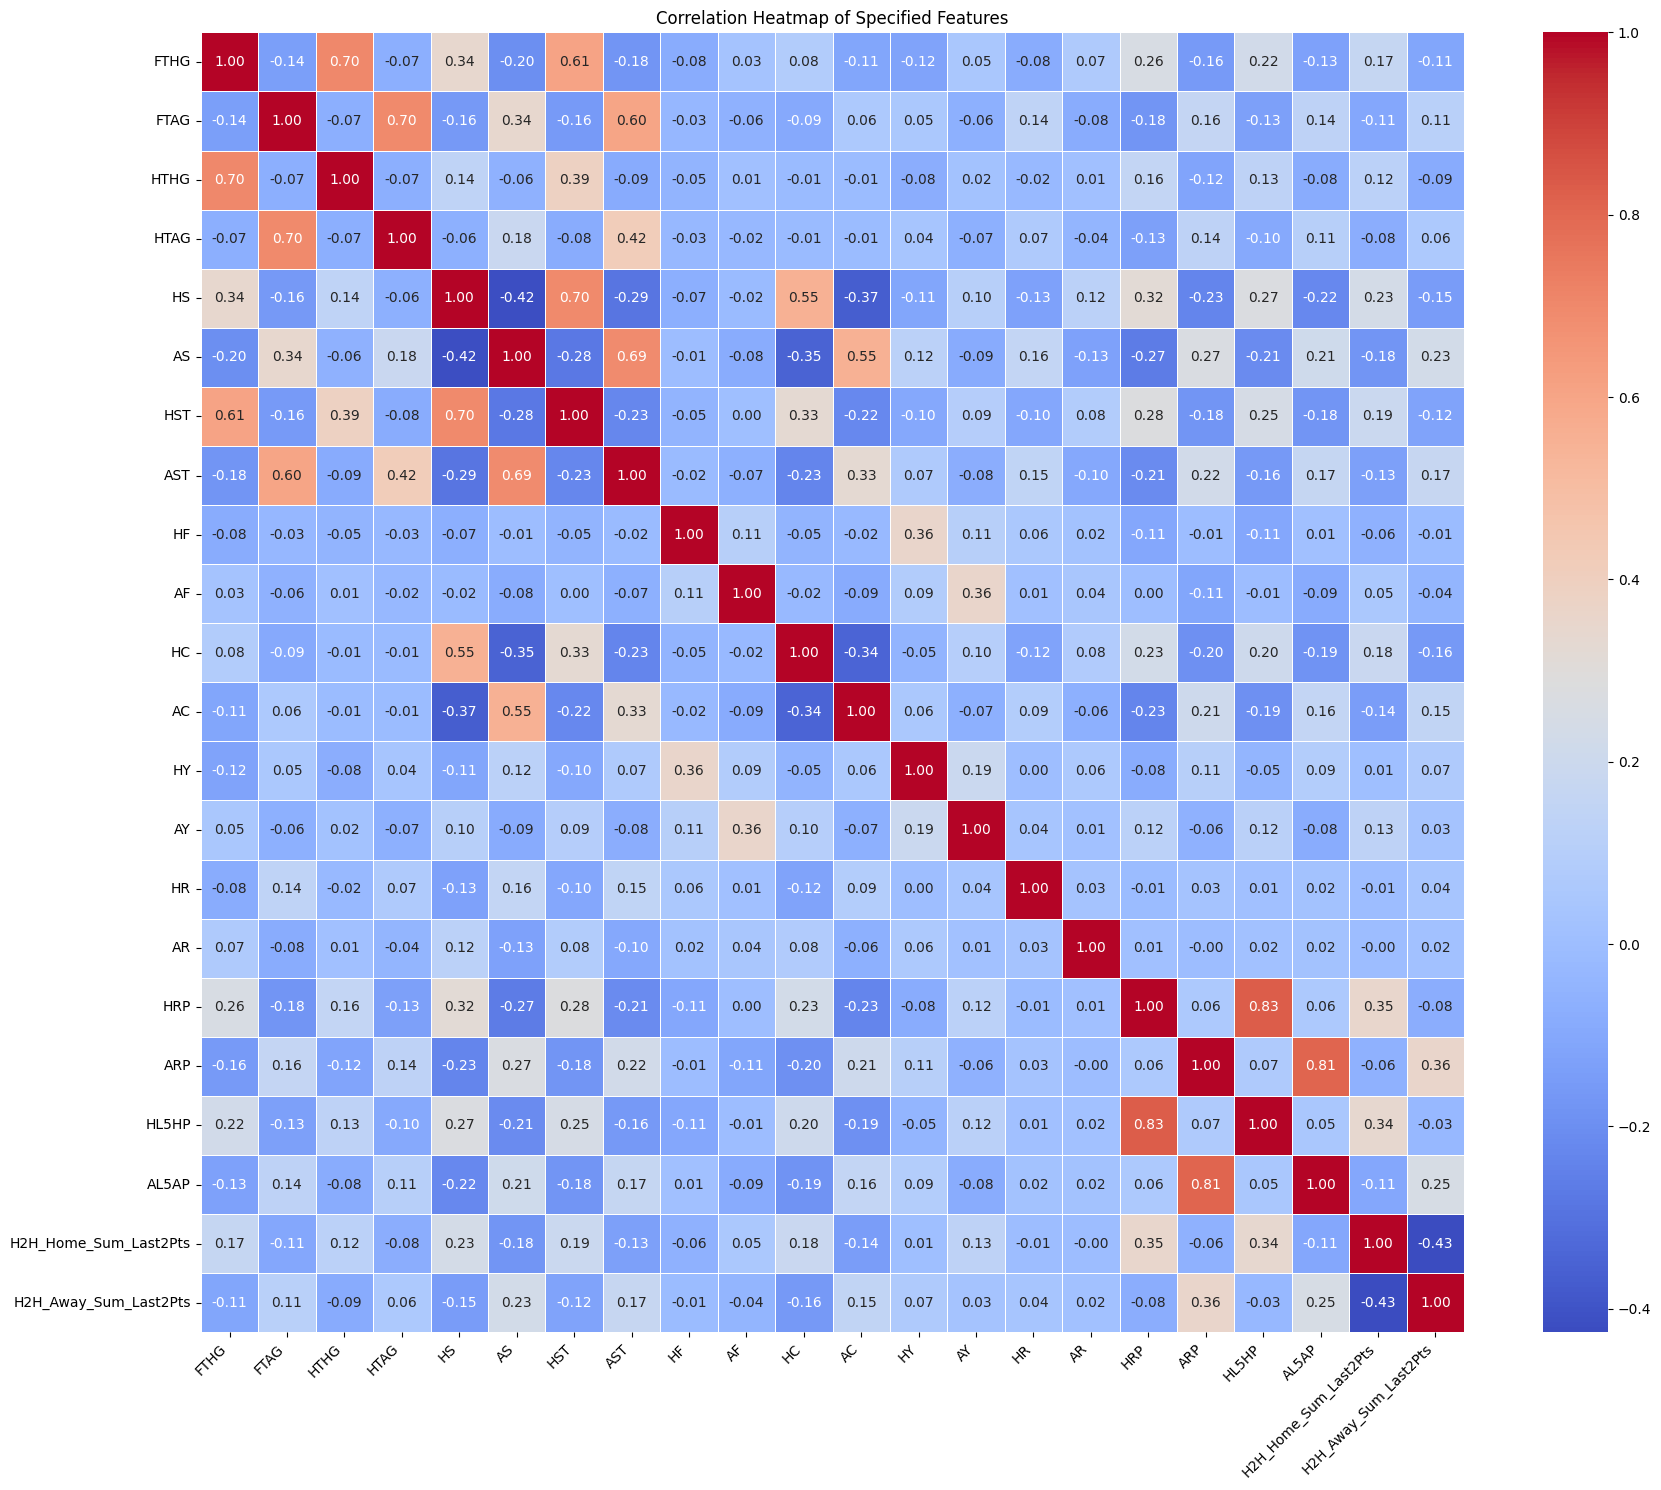

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of columns for the heatmap
heatmap_columns = ['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'HRP', 'ARP', 'HL5HP', 'AL5AP', 'H2H_Home_Sum_Last2Pts', 'H2H_Away_Sum_Last2Pts']

# Calculate the correlation matrix for the specified columns
correlation_matrix_specific = filtered_df[heatmap_columns].corr()

# Create the heatmap
plt.figure(figsize=(18, 15)) # Adjust figure size for better readability
sns.heatmap(correlation_matrix_specific, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Specified Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Handle Null Values

In [48]:
filtered_df.columns

Index(['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HTR',
       'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR', 'FTR', 'MatchOrder', 'HP', 'AP', 'HRP', 'ARP', 'HL5HP',
       'AL5AP', 'H2H_Home_Sum_Last2Pts', 'H2H_Away_Sum_Last2Pts',
       'FTR_encoded'],
      dtype='object')

In [49]:
display(filtered_df.isnull().sum())

,0
HomeTeam,0
AwayTeam,0
FTHG,0
FTAG,0
HTHG,0
HTAG,0
HTR,0
Referee,0
HS,0
AS,0


In [50]:
filtered_df = filtered_df.fillna(0)
display(filtered_df.head())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,...,MatchOrder,HP,AP,HRP,ARP,HL5HP,AL5AP,H2H_Home_Sum_Last2Pts,H2H_Away_Sum_Last2Pts,FTR_encoded
0,Fulham,Arsenal,0,3,0,1,A,C Kavanagh,5,13,...,1,0,3,0.0,0.0,0.0,0.0,0,0,2
1,Crystal Palace,Southampton,1,0,1,0,H,J Moss,5,9,...,2,3,0,0.0,0.0,0.0,0.0,0,0,0
2,Liverpool,Leeds,4,3,3,2,H,M Oliver,22,6,...,3,3,0,0.0,0.0,0.0,0.0,0,0,0
3,West Ham,Newcastle,0,2,0,0,D,S Attwell,15,15,...,4,0,3,0.0,0.0,0.0,0.0,0,0,2
4,West Brom,Leicester,0,3,0,0,D,A Taylor,7,13,...,5,0,3,0.0,0.0,0.0,0.0,0,0,2


# Drop Unrelated Columns

In [51]:
filtered_df.columns

Index(['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HTR',
       'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR', 'FTR', 'MatchOrder', 'HP', 'AP', 'HRP', 'ARP', 'HL5HP',
       'AL5AP', 'H2H_Home_Sum_Last2Pts', 'H2H_Away_Sum_Last2Pts',
       'FTR_encoded'],
      dtype='object')

In [52]:
filtered_df = filtered_df.drop(columns=['HomeTeam', 'AwayTeam', 'MatchOrder', 'FTR_encoded'])
display(filtered_df.head())

,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,...,AR,FTR,HP,AP,HRP,ARP,HL5HP,AL5AP,H2H_Home_Sum_Last2Pts,H2H_Away_Sum_Last2Pts
0,0,3,0,1,A,C Kavanagh,5,13,2,6,...,0,A,0,3,0.0,0.0,0.0,0.0,0,0
1,1,0,1,0,H,J Moss,5,9,3,5,...,0,H,3,0,0.0,0.0,0.0,0.0,0,0
2,4,3,3,2,H,M Oliver,22,6,6,3,...,0,H,3,0,0.0,0.0,0.0,0.0,0,0
3,0,2,0,0,D,S Attwell,15,15,3,2,...,0,A,0,3,0.0,0.0,0.0,0.0,0,0
4,0,3,0,0,D,A Taylor,7,13,1,7,...,0,A,0,3,0.0,0.0,0.0,0.0,0,0


# Encode Referee and HTR

In [53]:
referee_encoded = pd.get_dummies(filtered_df['Referee'], prefix='Referee', dtype=int)
filtered_df = pd.concat([filtered_df, referee_encoded], axis=1)
filtered_df = filtered_df.drop('Referee', axis=1)
display(filtered_df.head())

,FTHG,FTAG,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,...,Referee_R Madley,Referee_R Welch,Referee_S Allison,Referee_S Attwell,Referee_S Barrott,Referee_S Hooper,Referee_S Singh,Referee_T Bramall,Referee_T Harrington,Referee_T Robinson
0,0,3,0,1,A,5,13,2,6,12,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,H,5,9,3,5,14,...,0,0,0,0,0,0,0,0,0,0
2,4,3,3,2,H,22,6,6,3,9,...,0,0,0,0,0,0,0,0,0,0
3,0,2,0,0,D,15,15,3,2,13,...,0,0,0,1,0,0,0,0,0,0
4,0,3,0,0,D,7,13,1,7,12,...,0,0,0,0,0,0,0,0,0,0


In [54]:
referee_encoded = pd.get_dummies(filtered_df['HTR'], prefix='HTR', dtype=int)
filtered_df = pd.concat([filtered_df, referee_encoded], axis=1)
filtered_df = filtered_df.drop('HTR', axis=1)
display(filtered_df.head())

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,Referee_S Attwell,Referee_S Barrott,Referee_S Hooper,Referee_S Singh,Referee_T Bramall,Referee_T Harrington,Referee_T Robinson,HTR_A,HTR_D,HTR_H
0,0,3,0,1,5,13,2,6,12,12,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,5,9,3,5,14,11,...,0,0,0,0,0,0,0,0,0,1
2,4,3,3,2,22,6,6,3,9,6,...,0,0,0,0,0,0,0,0,0,1
3,0,2,0,0,15,15,3,2,13,7,...,1,0,0,0,0,0,0,0,1,0
4,0,3,0,0,7,13,1,7,12,9,...,0,0,0,0,0,0,0,0,1,0


In [55]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 68 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FTHG                   1900 non-null   int64  
 1   FTAG                   1900 non-null   int64  
 2   HTHG                   1900 non-null   int64  
 3   HTAG                   1900 non-null   int64  
 4   HS                     1900 non-null   int64  
 5   AS                     1900 non-null   int64  
 6   HST                    1900 non-null   int64  
 7   AST                    1900 non-null   int64  
 8   HF                     1900 non-null   int64  
 9   AF                     1900 non-null   int64  
 10  HC                     1900 non-null   int64  
 11  AC                     1900 non-null   int64  
 12  HY                     1900 non-null   int64  
 13  AY                     1900 non-null   int64  
 14  HR                     1900 non-null   int64  
 15  AR  

# Drop Some More Columns

In [65]:
columns_to_drop = [
    'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
    'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'HP', 'AP', 'HTR_A', 'HTR_D', 'HTR_H'
]
filtered_df = filtered_df.drop(columns=columns_to_drop, errors='ignore')
display(filtered_df.head())

,FTR,HRP,ARP,HL5HP,AL5AP,H2H_Home_Sum_Last2Pts,H2H_Away_Sum_Last2Pts,Referee_A Kitchen,Referee_A Madley,Referee_A Marriner,...,Referee_R Madley,Referee_R Welch,Referee_S Allison,Referee_S Attwell,Referee_S Barrott,Referee_S Hooper,Referee_S Singh,Referee_T Bramall,Referee_T Harrington,Referee_T Robinson
0,A,0.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,H,0.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,H,0.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A,0.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,A,0.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
filtered_df.columns

Index(['FTR', 'HRP', 'ARP', 'HL5HP', 'AL5AP', 'H2H_Home_Sum_Last2Pts',
       'H2H_Away_Sum_Last2Pts', 'Referee_A Kitchen', 'Referee_A Madley',
       'Referee_A Marriner', 'Referee_A Moss', 'Referee_A Taylor',
       'Referee_C Kavanagh', 'Referee_C Pawson', 'Referee_D Bond',
       'Referee_D Coote', 'Referee_D England', 'Referee_D Webb',
       'Referee_G Scott', 'Referee_J Brooks', 'Referee_J Gillett',
       'Referee_J Gillett ', 'Referee_J Moss', 'Referee_J Smith',
       'Referee_K Friend', 'Referee_K Kavanagh', 'Referee_L Mason',
       'Referee_L Smith', 'Referee_M Atkinson', 'Referee_M Dean',
       'Referee_M Donohue', 'Referee_M Oliver', 'Referee_M Salisbury',
       'Referee_O Oliver', 'Referee_P Bankes', 'Referee_P Tierney',
       'Referee_R Jones', 'Referee_R Madley', 'Referee_R Welch',
       'Referee_S Allison', 'Referee_S Attwell', 'Referee_S Barrott',
       'Referee_S Hooper', 'Referee_S Singh', 'Referee_T Bramall',
       'Referee_T Harrington', 'Referee_T Robinso

# Split the Dataset

In [67]:
from sklearn.model_selection import train_test_split

X = filtered_df.drop('FTR', axis=1) # Features are all columns except 'FTR'
y = filtered_df['FTR'] # Target is the 'FTR' column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1520, 46)
X_test shape: (380, 46)
y_train shape: (1520,)
y_test shape: (380,)


In [68]:
X.columns

Index(['HRP', 'ARP', 'HL5HP', 'AL5AP', 'H2H_Home_Sum_Last2Pts',
       'H2H_Away_Sum_Last2Pts', 'Referee_A Kitchen', 'Referee_A Madley',
       'Referee_A Marriner', 'Referee_A Moss', 'Referee_A Taylor',
       'Referee_C Kavanagh', 'Referee_C Pawson', 'Referee_D Bond',
       'Referee_D Coote', 'Referee_D England', 'Referee_D Webb',
       'Referee_G Scott', 'Referee_J Brooks', 'Referee_J Gillett',
       'Referee_J Gillett ', 'Referee_J Moss', 'Referee_J Smith',
       'Referee_K Friend', 'Referee_K Kavanagh', 'Referee_L Mason',
       'Referee_L Smith', 'Referee_M Atkinson', 'Referee_M Dean',
       'Referee_M Donohue', 'Referee_M Oliver', 'Referee_M Salisbury',
       'Referee_O Oliver', 'Referee_P Bankes', 'Referee_P Tierney',
       'Referee_R Jones', 'Referee_R Madley', 'Referee_R Welch',
       'Referee_S Allison', 'Referee_S Attwell', 'Referee_S Barrott',
       'Referee_S Hooper', 'Referee_S Singh', 'Referee_T Bramall',
       'Referee_T Harrington', 'Referee_T Robinson'],
  

# Train and Test Distribution

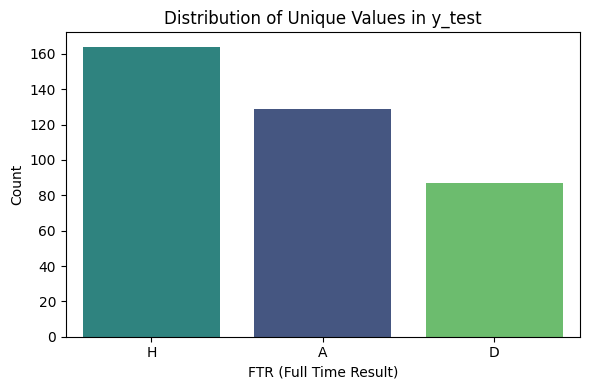

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x=y_test, hue=y_test, order=y_test.value_counts().index, palette='viridis', legend=False)
plt.title('Distribution of Unique Values in y_test')
plt.xlabel('FTR (Full Time Result)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Modeling

## Random Forrest

In [69]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42) # Using a fixed random_state for reproducibility

# Fit the model to the training data
rf_model.fit(X_train, y_train)

print("Random Forest Classifier fitted successfully!")

Random Forest Classifier fitted successfully!


In [70]:
from sklearn.metrics import accuracy_score

y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Random Forest Classifier Training Accuracy: {train_accuracy:.4f}")

Random Forest Classifier Training Accuracy: 0.9993


In [71]:
from sklearn.metrics import accuracy_score

y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Random Forest Classifier Test Accuracy: {test_accuracy:.4f}")

Random Forest Classifier Test Accuracy: 0.4947


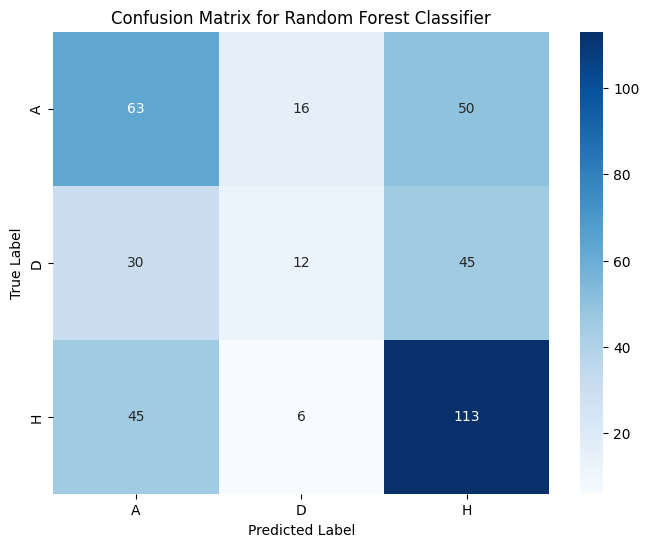

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions from the Random Forest model on the test set
y_test_pred = rf_model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Get unique classes from y_test for labels
class_labels = sorted(y_test.unique())

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
# Using 'liblinear' solver for multiclass classification with L1/L2 regularization
lr_model = LogisticRegression(random_state=42, solver='liblinear', multi_class='auto')

# Fit the model to the training data
lr_model.fit(X_train, y_train)

print("Logistic Regression model fitted successfully!")

Logistic Regression model fitted successfully!


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [73]:
from sklearn.metrics import accuracy_score

# Training accuracy
y_train_pred_lr = lr_model.predict(X_train)
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
print(f"Logistic Regression Training Accuracy: {train_accuracy_lr:.4f}")

# Test accuracy
y_test_pred_lr = lr_model.predict(X_test)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
print(f"Logistic Regression Test Accuracy: {test_accuracy_lr:.4f}")

Logistic Regression Training Accuracy: 0.5263
Logistic Regression Test Accuracy: 0.5158


# Next Meeting Plan:

Smooth The Test Set